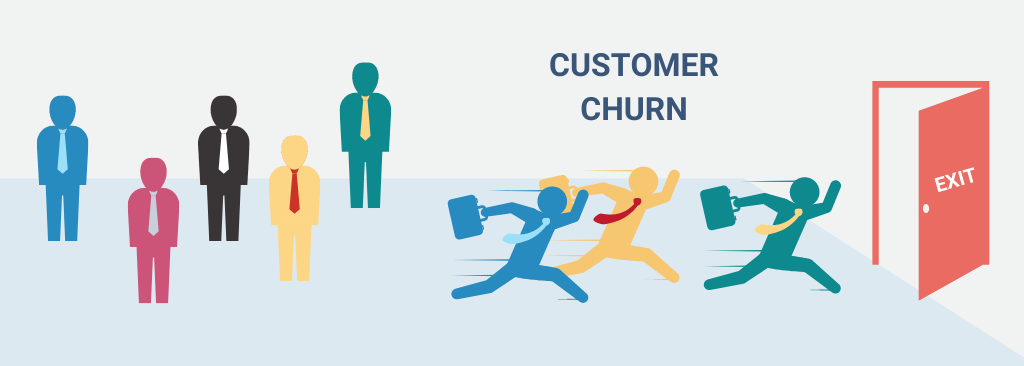

# Indtroduction

**E-commerce customer churn prediction**


Churn prediction is identifying customers that are most likely to live a service. This is important for most companies as acquiring new customers is more costlier than retaining old ones, So the results of Churn prediction help companies focus on customers that are likely to churn and develop strategies for retaining those customers.

# **Problem to focus on**

One of the important problems in the online buying and selling business is how companies can keep their consumers loyal and not move to other companies' online platforms. Consumers are the company's main asset, so one way companies retain consumers is by predicting customer churn. By making predictions, companies are able to identify potential customers (customer retention) so that the company can implement appropriate marketing strategies such as providing discount promotions or cashback to customers who have the potential to churn so as to prevent these customers from stopping purchases and moving to competing companies (churn).

With this customer churn prediction model, companies can minimize losses due to losing a number of customers because the company is able to identify customers who are loyal and who are not. So the costs incurred to attract new customers can be avoided by retaining loyal customers where the costs of retaining existing customers are relatively lower than attracting new customers.

**our project goal **


*   To propose commercial actions aimed at maintaining
clients that are showing signs of
churn and offer them customised offers.
*    To develop prediction models for the customer churns in Ecommerce Company, analysing
different attributes related to customer churn



In [154]:
import numpy as np
import pandas as pd
from google.colab import files
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno #missing values
import plotly.express as px
from scipy.stats import zscore
from google.colab import drive
drive.mount('/content/drive')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.gridspec as gridspec
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!pip install streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


About the dataset

This is a dataset of leading ecommerce company and we have analysis who are churn(leaving the company service) and have to make predicting churn model.

In [ ]:
df_original=pd.read_csv("/content/customer churn prediction .csv")


# **Data Collection**
The data is collected for this project from Kaggle for an e-commerce website. The empirical study
starts in June 2021, and the observation ends in November 2021. The consumption data of
customers who purchased goods on the website is selected for analysis and prediction. The dataset
contains customer’s consumption records in addition to historical behavioural interactions while
using the platform.

In [ ]:
df_original

In [ ]:
df_original.head()

In [ ]:
df_original.shape

In [ ]:
df_original.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.221492  
std       2.939680           3.654433       49.193869  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           3.000000      163.000000  
75%       3.000000           7.000000      196.000000  
max      16.000000          46.000000      325.000000

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

There are 5630 rows and 20 columns


 The effectiveness of this data is that it contains some specific detailed attributes which will help in
customer segmentation such as: preferred login device, Satisfaction store and other attributes.

# Exploratory data analysis

**we will focus on the following first so that we  continue to other section**

1.  Visualize the distribution of numerical features using histograms or kernel density plots.

2.   Explore categorical features using bar charts or count plots to understand their frequencies and distributions.

3.    Use scatteplots or pair plots to identify relationships between numerical features.
4.   Analyze correlations between features using correlation matrices or heatmaps.
5.   Identify outliers or anomalies in the data and decide how to handle them.



In [ ]:
daf=df_original.copy()
daf

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0             160  
1            0.0         1.0                0.0             121  
2            0.0         1.0                3.0             120  
3            0.0         1.0                3.0             134  
4            1.0         1.0                3.0             130  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0             151  
5626         1.0         2.0  

In [ ]:
df_original.columns


Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:

churn_sum = df_original['Churn'].sum()

print(f'The sum of churn is: {churn_sum}')


The sum of churn is: 948


In [ ]:
df_original.select_dtypes(include='object').nunique()

PreferredLoginDevice    3
PreferredPaymentMode    7
Gender                  2
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [ ]:
fig = px.histogram(daf, x='Tenure', color='Churn', marginal='box', title='Distribution of Tenure by Churn')
fig.show()

The x-axis represents the customer tenure, likely in months or years based on the data range.
The y-axis shows the number of customers for each tenure bin. The overall distribution appears skewed, with more customers having a shorter tenure and a smaller number having a longer tenure.
Tenure and Churn:

The histogram is colored by churn (0 likely represents not churned, 1 likely represents churned). There seems to be a higher concentration of churned customers towards the lower end of the tenure distribution (shorter tenures).
This suggests that customers who churn tend to do so earlier in their relationship with the company.

Additionallyin the image, there seem to be data points beyond the ends of the whiskers, particularly on the upper end of the tenure distribution (towards the right side). These points are likely candidates for outliers.

Overall, while the visualization suggests potential outliers, it's important to perform further analysis to confirm their presence and impact.

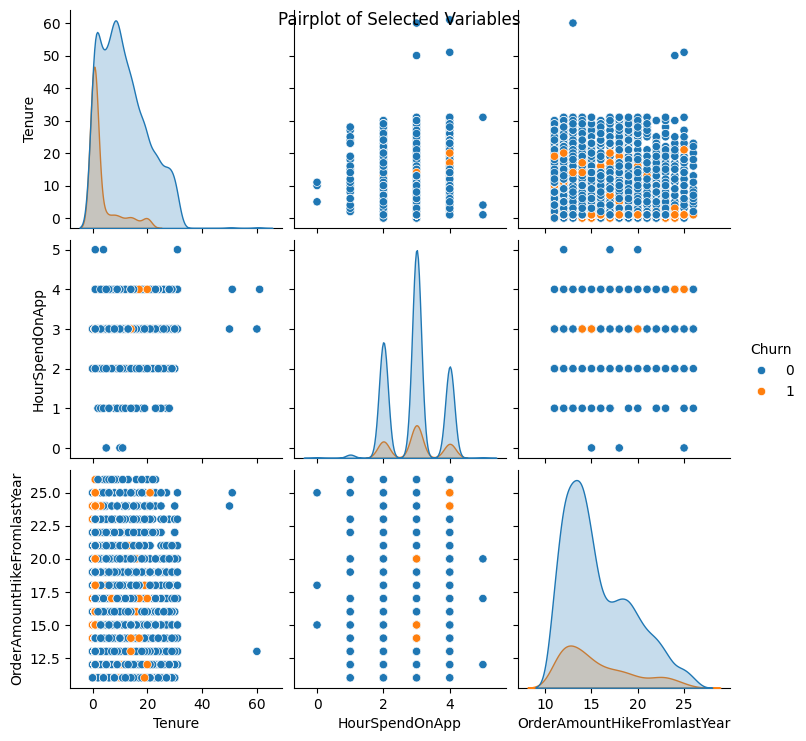

In [ ]:
sns.pairplot(daf[['Tenure', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'Churn']], hue='Churn', diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables')
plt.show()

**Tenure vs. HourSpendOnApp:**

There appears to be a weak positive correlation. Customers with a longer tenure might spend slightly more time on the app on average.
The distribution of HourSpendOnApp shows a wider spread for customers with higher tenure, suggesting more variation in app usage among long-term customers.

**Tenure vs. OrderAmountHikeFromLastYear:**

No clear linear relationship is evident. There's a scattered distribution of points across the entire tenure range.


**HourSpendOnApp vs. OrderAmountHikeFromLastYear:**

No strong correlation is observable. There's a scattered distribution of points, indicating that spending more time on the app doesn't necessarily translate to a higher increase in order value.

**Churn vs. Tenure :**

The distribution of tenure for churned  and non-churned  customers appears to overlap to a significant degree. There are churned customers across all tenure ranges, and vice versa.
While there might be a slightly higher concentration of churned customers towards the lower end of the tenure distribution (shorter tenures), the overall pattern is not definitive.

**Churn vs. HourSpendOnApp :**

There's no clear distinction between churned and non-churned customers based on app usage. Both groups seem to have a similar spread of HourSpendOnApp values.

**Churn vs. OrderAmountHikeFromLastYear:**

There's no evident pattern. Churned and non-churned customers appear to be distributed similarly across the range of order value increase.

**Overall Observations:**

The pairplot suggests that none of the explored features (Tenure, HourSpendOnApp, OrderAmountHikeFromLastYear) has a strong, independent relationship with churn.
Tenure might have a weak association with churn, with potentially higher churn risk for customers with shorter tenures. However, this is not a definitive trend.
HourSpendOnApp and OrderAmountHikeFromLastYear don't seem to be strong predictors of churn on their own.

In [ ]:
fig = px.scatter(daf, x='HourSpendOnApp', y='OrderCount', color='Churn', hover_data=['Tenure'], title='Hour Spend on App vs. Order Count')
fig.show()

There's no strong linear correlation between hour spent on app and order count. There's a scattered distribution of points across the entire range of both axes.
The distribution of order counts for churned customers seems spread out throughout the graph. There are churned customers with both high and low order counts.The distribution of order counts for non-churned customers also appears scattered across the entire range. There's no clear distinction between churned and non-churned customers based solely on order count and hour spent on app.
Spending more time on the app doesn't necessarily lead to more orders. There are customers who spend a lot of time on the app but don't order frequently, and vice versa.
Order count alone might not be a sufficient indicator of churn risk. Customers with high order counts can still churn, and vice versa.


so  it's not directly reflected in the visual encoding of the plot itself. may be  using a different plot type can explore the relationship between tenure, hour spent on app, and order count

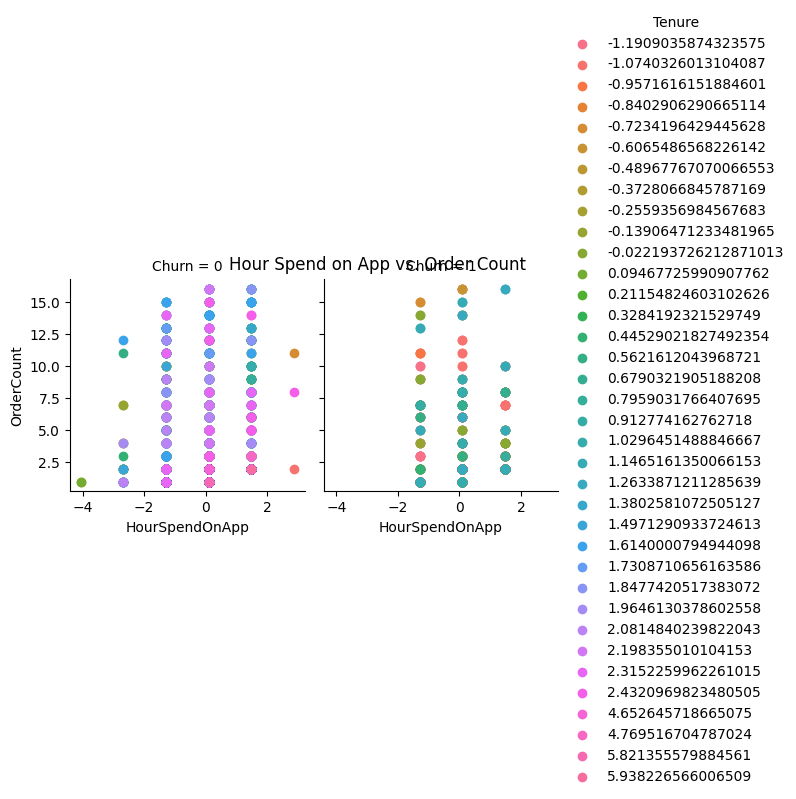

In [ ]:

# Create FacetGrid colored by churn with tenure as hue
g = sns.FacetGrid(df_original, col='Churn', hue='Tenure')
g.map(plt.scatter, 'HourSpendOnApp', 'OrderCount')  # Scatter plot on each facet
g.add_legend()  # Add legend for tenure

# Customize title and labels
g.fig.suptitle('Hour Spend on App vs. Order Count ')
g.fig.subplots_adjust(top=0.9)  # Adjust spacing

plt.show()


The scatter plot with FacetGrid, colored by tenure (hue), reveals that tenure and order count alone are not strong predictors of customer churn.

 **observations:**

No Clear Relationship: There's no evident linear correlation between tenure and order count for either churned or non-churned customers. Data points are scattered throughout the entire range on both axes.

Order Count Distribution: The distribution of order counts for churned and non-churned customers seems to overlap significantly. Customers with high and low order counts are present across all tenure groups in both categories.

Tenure and Churn: While there might be a slightly higher concentration of churned customers towards the lower end of the tenure range , it's not a definitive trend. Many churned customers have high tenure



Numbers on the Right
they indicate the range of order counts in your data.

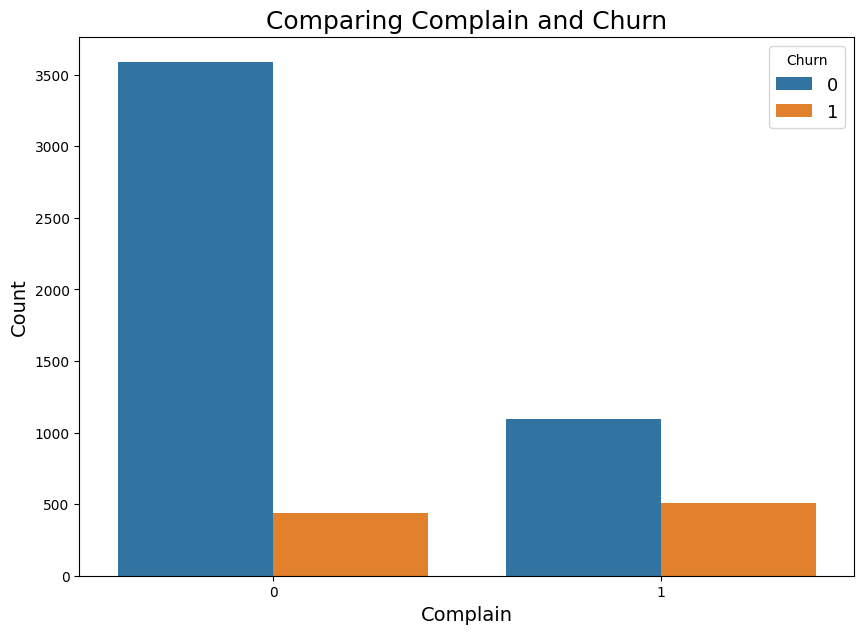

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="Complain", hue="Churn", data=df_original)

plt.title('Comparing Complain and Churn', fontsize=18)
plt.xlabel('Complain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', prop={'size': 13}, loc='upper right')

total_counts = len(df_original)

**Insights**
1. Customers with the highest churn
are on customer complaints.
2. Customers with the lowest churn of
non-complaining customers.

The more customer complaints increase, the
higher the churn rate.


In [ ]:

# Satisfaction Score vs Churn
fig_satisfaction = px.box(df_original, x='Churn', y='SatisfactionScore', color='Churn', points='all', title='Satisfaction Score vs Churn')
fig_satisfaction.update_traces(quartilemethod="inclusive")
fig_satisfaction.show()



The satisfaction scores of both churned and non-churned customers are generally similar, with the medians being relatively close. Although there may be a slight tendency for non-churned customers to have slightly higher scores, the difference in medians is minimal. The interquartile ranges for both groups are similar, suggesting a similar level of variability in satisfaction scores. However, there are a few outliers on both ends, representing customers with high or low satisfaction scores, regardless of their churn status.

In [ ]:
# Days Since Last Order vs Churn
fig_days_since_order = px.box(df_original, x='Churn', y='DaySinceLastOrder', color='Churn', points='all', title='Days Since Last Order vs Churn')
fig_days_since_order.update_traces(quartilemethod="inclusive")
fig_days_since_order.show()



This suggests that churned customers, on average, tend to have a longer period of inactivity (more days since their last order) compared to non-churned customers.
Spread and Outliers: The interquartile range (IQR) for days since last order appears to be larger for churned customers (red box) compared to non-churned customers (blue box).
This indicates that the distribution of days since last order for churned customers is more spread out, with potentially more variation in inactivity periods.
However, there seem to be more outliers for churned customers, especially towards the higher end (longer periods of inactivity).
Key Takeaways: Days since last order appears to be a stronger predictor of churn compared to satisfaction score (based on the previous box plot).
Customers with a longer period of inactivity (higher number of days since last order) are more likely to churn.
It can be valuable to identify a threshold for days since last order that might indicate a higher risk of churn.

In [ ]:
# Preferred Payment Method vs Churn
fig_payment_method = px.histogram(df_original, x='PreferredPaymentMode', color='Churn', title='Preferred Payment Method vs Churn', barmode='group')
fig_payment_method.update_layout(bargap=0.1)
fig_payment_method.show()


Credit cards (CC) appear to be the most popular payment method for both churned (red bars) and non-churned (blue bars) customers. The height of the credit card bars suggests a higher number of customers using this method compared to others.
Debit cards and UPI (likely a Unified Payments Interface specific to India) follow in terms of usage based on the bar heights.
Cash on Delivery (COD) and other payment methods (bars on the right) seem to be used less frequently by both churned and non-churned customers, as indicated by their shorter bars.
Distribution Across Churn:

There's no clear distinction in payment method preference between churned and non-churned customers. The colors (red and blue) are distributed fairly evenly across all payment method bars. This suggests that customers who use credit cards, debit cards, UPI, COD, or other payment methods churn at similar rates.

**observeation **


here  height of each bar in the histogram represents the number of customers who use that specific payment method.
High Values: The payment methods with the highest bars likely represent the most popular choices among both churned (red bars) and non-churned (blue bars) customers. Credit cards might be an example based on your description.
Low Values: The payment methods with shorter bars represent less popular choices used by a smaller number of customers in your data. Cash on Delivery (COD) and "Other" payment methods might fall into this category.
Possible Reasons for Low Values:

Less Common Payment Methods: These payment methods might be inherently less popular overall compared to credit cards or debit cards.
Limited Availability: The payment method might not be offered in all regions or for all product categories.


In [ ]:

# City Tier vs Churn
fig_city_tier = px.histogram(df_original, x='CityTier', color='Churn', title='City Tier vs Churn', barmode='group')
fig_city_tier.update_layout(bargap=0.1)
fig_city_tier.show()

The distribution of city tiers appears to be somewhat similar for churned and non-churned customers. The bars for each tier (1, 2, 3, etc.) have comparable heights across both churn colors (red and blue)

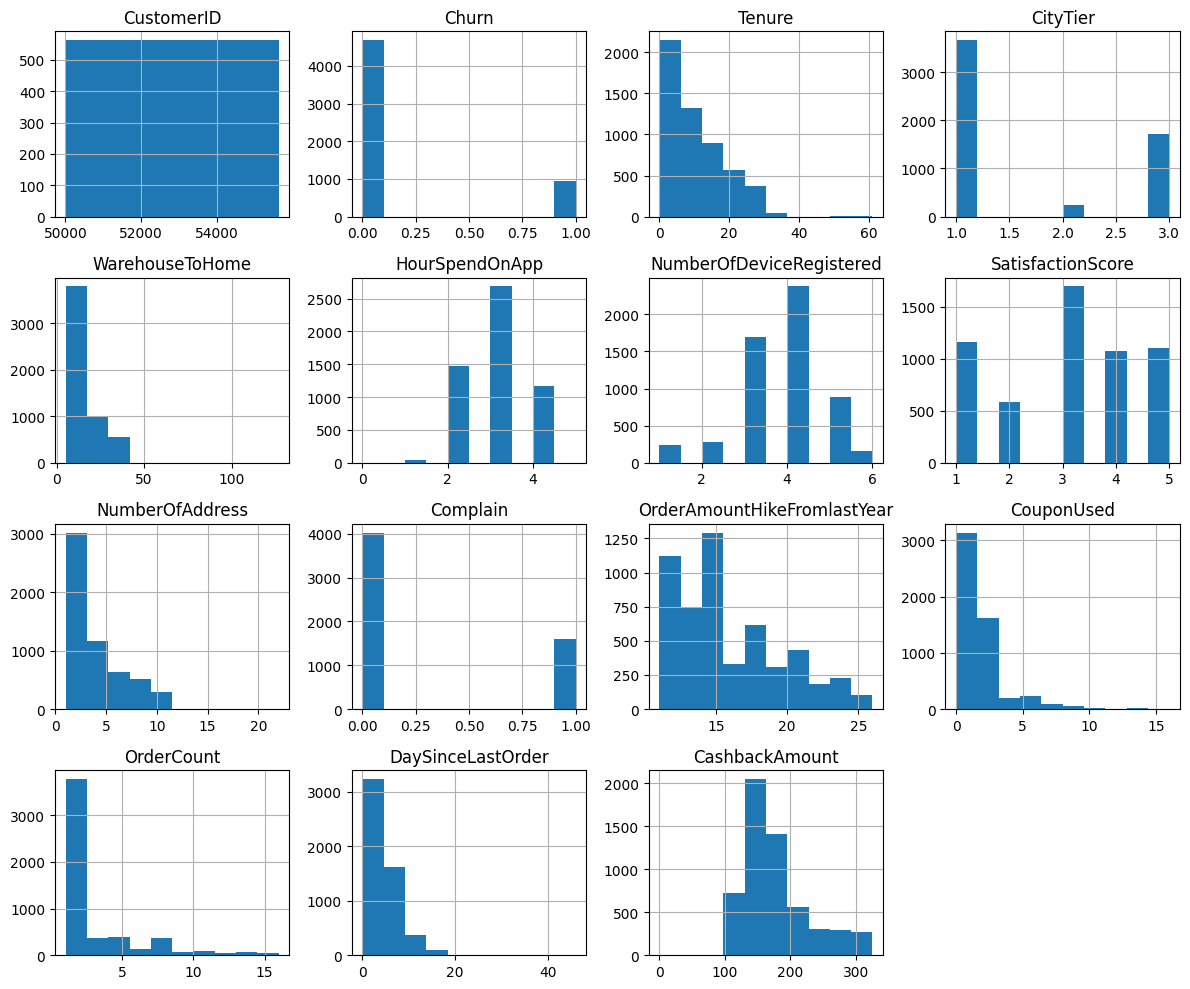

In [ ]:
# Histograms for numeric features
df_original.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()



Most of the data in numerical column is not normally distributed. The data in Tenure, WarehouseToHome, NumberOfAddress, and DaySinceLastOrder is right-skewed. The data in CashbackAmount is left-skewed. This mean that most of the column contains outliers which could become a noise to our machine learning model if the outliers are not acceptable based on domain knowledge

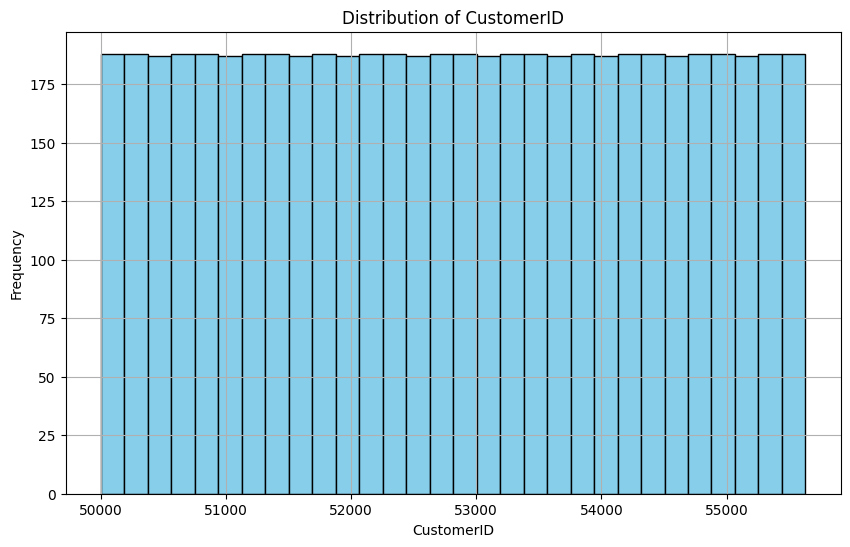

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df_original['CustomerID'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.title('Distribution of CustomerID')
plt.grid(True)
plt.show()

In order to better comprehend the data, the first exploration comprised examining feature distribution, spotting any correlations with churn, and creating visualizations.

Important findings include  the following:

*  Tenure: There was a minor bias towards lower tenure values, but overall, the distribution of customer tenure was fairly even.

* Order Count: A lengthy range was seen in the number of orders, indicating an uncommonly active customer base.

* Satisfaction Score: Higher churn rates were typically observed among customers with lower satisfaction scores.

* Days Since Last Order: A higher chance of churn was related to a longer period of time since the last order.

* Preferred Payment Method: This seems to be a correlation between higher churn rates and specific payment methods, such as cash on delivery.

* City Tier: The churn behavior changed greatly between city tiers.

* For the coustmerId column there is no meaning of keeping it so we  will drop it

In [ ]:
df_original

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0         Mobile Phone         3              6.0   
1         1     NaN                Phone         1              8.0   
2         1     NaN                Phone         1             30.0   
3         1     0.0                Phone         3             15.0   
4         1     0.0                Phone         1             12.0   
...     ...     ...                  ...       ...              ...   
5625      0    10.0             Computer         1             30.0   
5626      0    13.0         Mobile Phone         1             13.0   
5627      0     1.0         Mobile Phone         1             11.0   
5628      0    23.0             Computer         3              9.0   
5629      0     8.0         Mobile Phone         1             15.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0              Debit Card  Female             3.0                         3   
1                     UPI    Male             3.0                         4   
2              Debit Card    Male             2.0                         4   
3              Debit Card    Male             2.0                         4   
4                      CC    Male             NaN                         3   
...                   ...     ...             ...                       ...   
5625          Credit Card    Male             3.0                         2   
5626          Credit Card    Male             3.0                         5   
5627           Debit Card    Male             3.0                         2   
5628          Credit Card    Male             4.0                         5   
5629          Credit Card    Male             3.0                         2   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0     Laptop & Accessory                  2        Single                9   
1                 Mobile                  3        Single                7   
2                 Mobile                  3        Single                6   
3     Laptop & Accessory                  5        Single                8   
4                 Mobile                  5        Single                3   
...                  ...                ...           ...              ...   
5625  Laptop & Accessory                  1       Married                6   
5626             Fashion                  5       Married                6   
5627  Laptop & Accessory                  4       Married                3   
5628  Laptop & Accessory                  4       Married                4   
5629  Laptop & Accessory                  3       Married                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0            1                         11.0         1.0         1.0   
1            1                         15.0         0.0         1.0   
2            1                         14.0         0.0         1.0   
3            0                         23.0         0.0         1.0   
4            0                         11.0         1.0         1.0   
...        ...                          ...         ...         ...   
5625         0                         18.0         1.0         2.0   
5626         0                         16.0         1.0         2.0   
5627         1                         21.0         1.0         2.0   
5628         0                         15.0         2.0         2.0   
5629         0                         13.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
0                   5.0             160  
1                   0.0             121  
2                   3.0             120  
3                   3.0             134  
4                   3.0             130  
...                 ...             ...  
5625                4.0             151  
5626                NaN             225  
5627                4.0             

# Data pre-processing

sections in data pre-proccesing


*   cleaning
*   checking missing values

*   checking for duplication
*   checking outliers



**After this procceses we will visualize them using different plots
and try to procces the data with correct implentations
finally we will visual the proceces before and after  
to see what impact we did.**

***We use isnull().sum() to check for missing values in each column of the DataFrame. Missing values can impact the quality of our analysis and modeling, so it's crucial to identify and handle them appropriately.***

In [ ]:
missingvalues=df_original.isnull().sum()
missingvalues

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
#total missing values
print(f'The number of missing values: {df_original.isnull().sum().sum()}')
print(f'The number of rows with missing values: {df_original[df_original.isnull().any(axis=1)].shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856


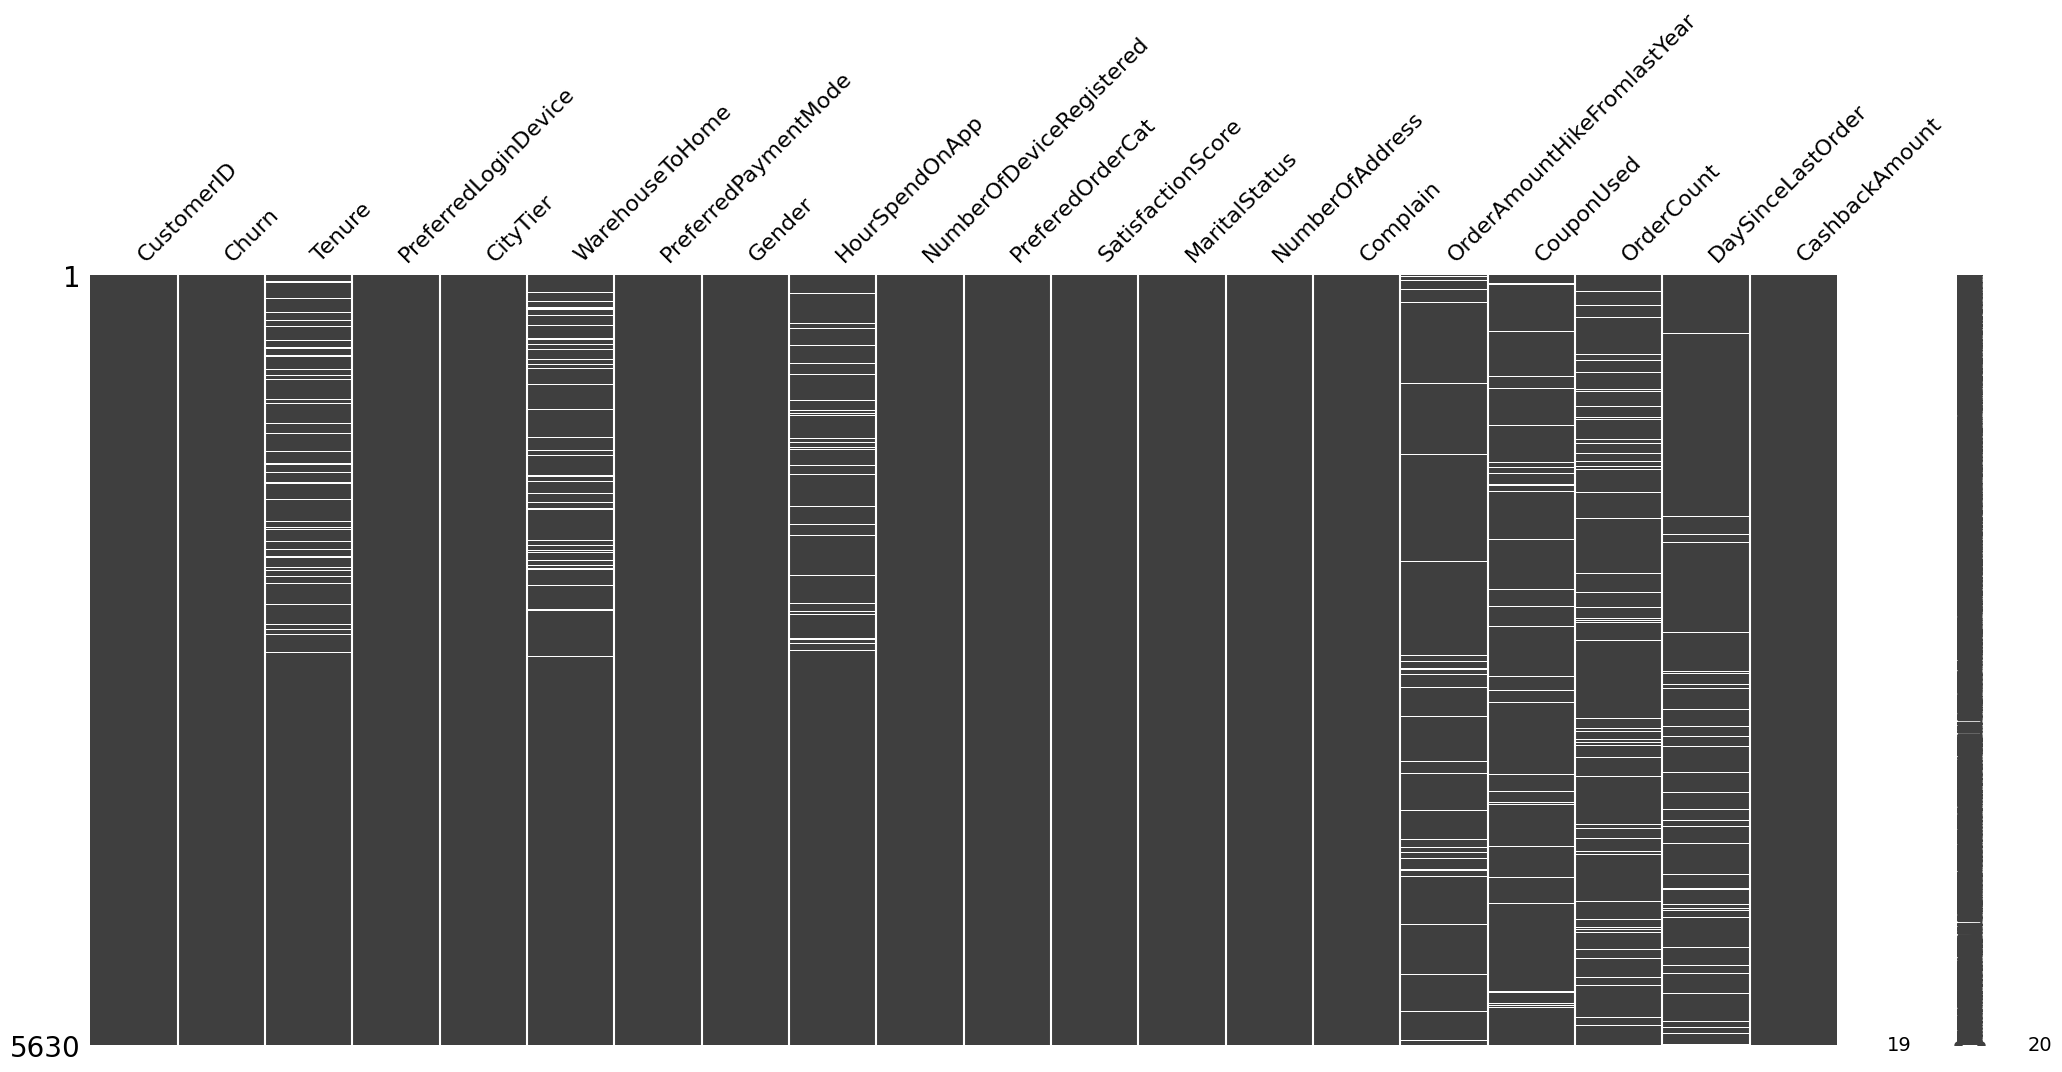

In [ ]:
msno.matrix(df_original)
plt.show()


Determine which columns have the largest percentage of missing data before imputation.

It might be necessary to pay extra attention to certain columns during imputation or analysis.

Keep an eye out for any missing value clusters or trends. This may show correlations between the absence of data in various columns.

Determine the total amount of missing data in the dataset. To comprehend the accuracy of the data and any potential biases, this information is important.


In [ ]:
duplicated=df_original.duplicated().sum()
duplicated

0

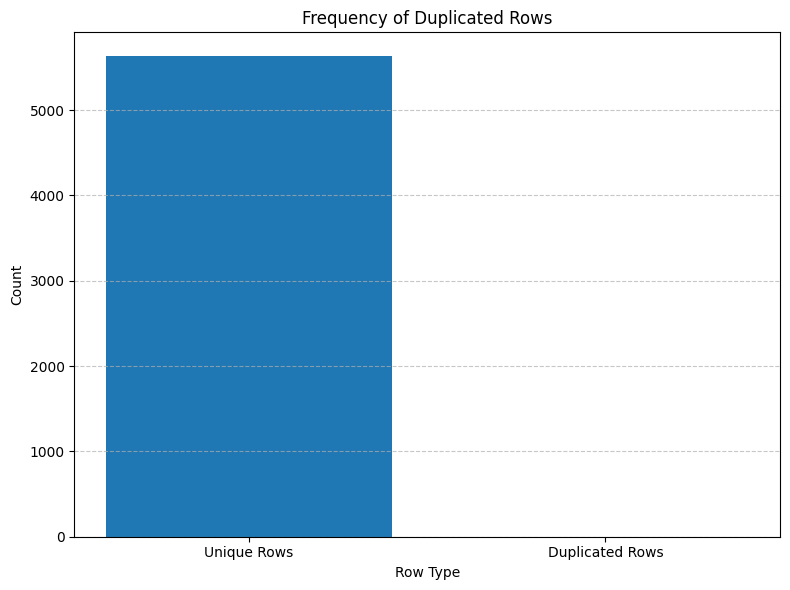

Number of duplicated rows: 0


In [ ]:


# Assuming df_original is your DataFrame
# Check for duplicated rows
duplicated_rows = df_original.duplicated()

# Count the number of duplicated rows
num_duplicated_rows = duplicated_rows.sum()

# Visualize the frequency of duplicated rows
plt.figure(figsize=(8, 6))
plt.bar(['Unique Rows', 'Duplicated Rows'], [len(df_original) - num_duplicated_rows, num_duplicated_rows])
plt.xlabel('Row Type')
plt.ylabel('Count')
plt.title('Frequency of Duplicated Rows')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the number of duplicated rows
print("Number of duplicated rows:", num_duplicated_rows)


In [ ]:
import pandas as pd

duplicated_cols = df_original.T.duplicated()

# Find the duplicated column names
duplicated_col_names = df_original.columns[duplicated_cols].tolist()

# Print the duplicated column names
print("Duplicated column names:", duplicated_col_names)


Duplicated column names: []


It is clearly showing that there is no duplication which is good for us to procced with the next step


In [ ]:
#imputation
numeric_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].median())

categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
df_original[categorical_columns] = df_original[categorical_columns].fillna(df_original[categorical_columns].mode().iloc[0])

print(df_original.isnull().sum())


CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [ ]:
#another advanced way of impuation
from sklearn.impute import KNNImputer

# Initialize KNN imputer with k=5 (number of neighbors)
imputer = KNNImputer(n_neighbors=5)

# Impute missing values using KNN imputer for numeric columns
df_numeric = df_original.select_dtypes(include=['number'])
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
df_original[df_numeric.columns] = df_imputed
imputer
df_imputed

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0        50001.0    1.0     4.0       3.0              6.0             3.0   
1        50002.0    1.0     2.6       1.0              8.0             3.0   
2        50003.0    1.0     2.6       1.0             30.0             2.0   
3        50004.0    1.0     0.0       3.0             15.0             2.0   
4        50005.0    1.0     0.0       1.0             12.0             2.6   
...          ...    ...     ...       ...              ...             ...   
5625     55626.0    0.0    10.0       1.0             30.0             3.0   
5626     55627.0    0.0    13.0       1.0             13.0             3.0   
5627     55628.0    0.0     1.0       1.0             11.0             3.0   
5628     55629.0    0.0    23.0       3.0              9.0             4.0   
5629     55630.0    0.0     8.0       1.0             15.0             3.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                          3.0                2.0              9.0       1.0   
1                          4.0                3.0              7.0       1.0   
2                          4.0                3.0              6.0       1.0   
3                          4.0                5.0              8.0       0.0   
4                          3.0                5.0              3.0       0.0   
...                        ...                ...              ...       ...   
5625                       2.0                1.0              6.0       0.0   
5626                       5.0                5.0              6.0       0.0   
5627                       2.0                4.0              3.0       1.0   
5628                       5.0                4.0              4.0       0.0   
5629                       2.0                3.0              4.0       0.0   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                            11.0         1.0         1.0                5.0   
1                            15.0         0.0         1.0                0.0   
2                            14.0         0.0         1.0                3.0   
3                            23.0         0.0         1.0                3.0   
4                            11.0         1.0         1.0                3.0   
...                           ...         ...         ...                ...   
5625                         18.0         1.0         2.0                4.0   
5626                         16.0         1.0         2.0                3.2   
5627                         21.0         1.0         2.0                4.0   
5628                         15.0         2.0         2.0                9.0   
5629                         13.0         2.0         2.0                3.0   

      CashbackAmount  
0              160.0  
1              121.0  
2              120.0  
3              134.0  
4              130.0  
...              ...  
5625           151.0  
5626           225.0  
5627           186.0  
5628           179.0  
5629           169.0  

[5630 rows x 15 columns]

#  why imputation not to just delete them?
In total there are 1856 missing values, meaning that each of the missing value is on a different row, and no row has more than one missing value.

So if we drop all the rows with missing values we would be dropping 1856 rows that is 32.97% of the dataset and will cause a data loss

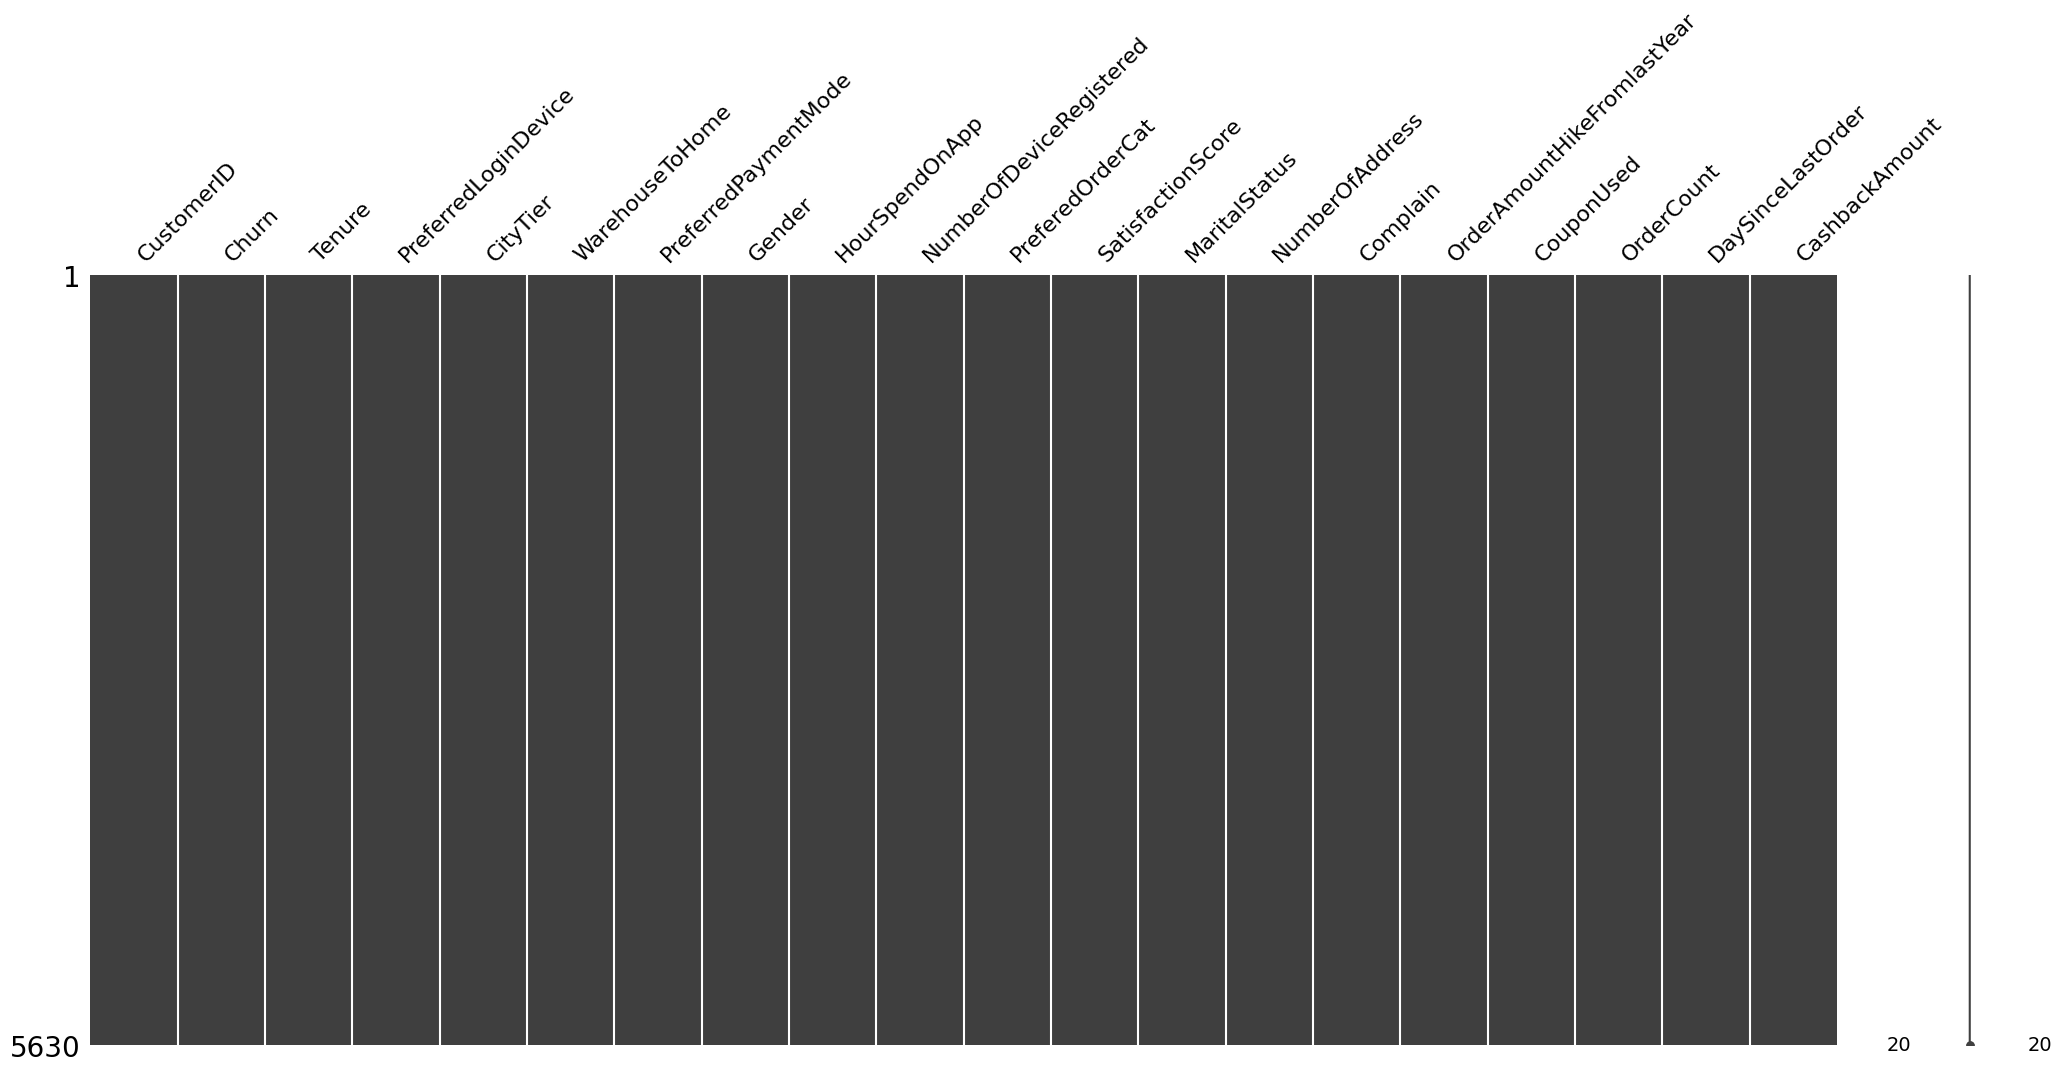

In [ ]:
msno.matrix(df_original)
plt.show()


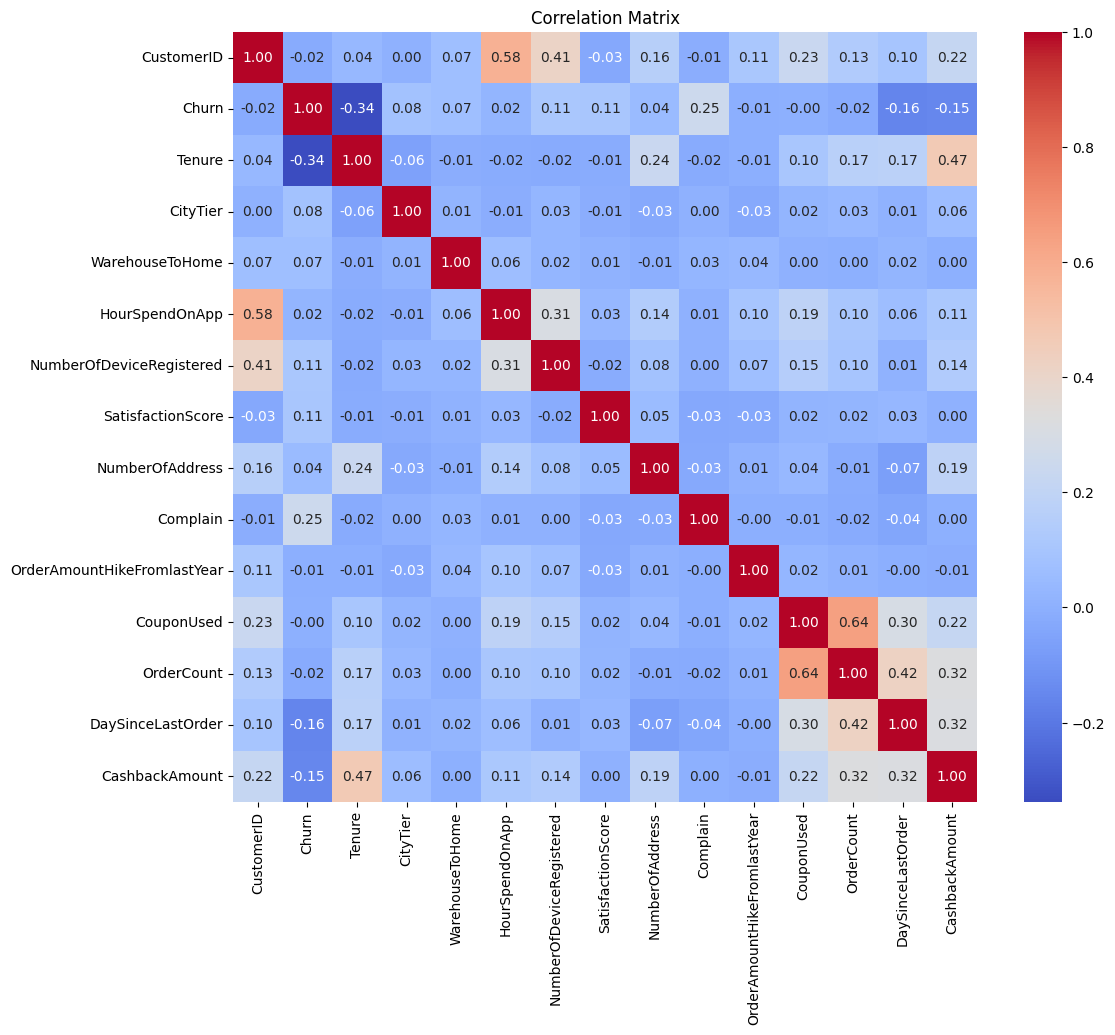

In [ ]:
# Correlation matrix
corr_matrix = df_imputed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Positive Correlations:**

OrderCount has a moderate positive correlation with NumberOfDeviceRegistered (0.32) and CouponUsed (0.19). This suggests that customers who place more orders tend to have more devices registered to their account and use coupons more frequently.

SatisfactionScore has a weak positive correlation with OrderCount (0.03) and NumberOfAddress (0.054). This suggests a slight tendency for customers with higher satisfaction scores to order more and have multiple delivery addresses.

CashbackAmount has a weak positive correlation with OrderAmountHikeFromlastYear (0.018). This might indicate that customers who receive higher cashbacks tend to increase their order value year-over-year.

**negative Correlations:**

DaySinceLastOrder (presumably indicating churn risk) has a weak negative correlation with OrderCount (-0.2) and CouponUsed (-0.29). This suggests that customers who place more orders and use coupons more frequently tend to have fewer days since their last order (potentially lower churn risk).

OrderCount has a very weak negative correlation with Tenure (-0.024). There is almost no relationship between a customer's tenure and the number of orders they place.
Neutrality:

Many correlations appear close to zero, indicating little to no linear relationship between those features.
Important Considerations:

Correlation doesn't imply causation: Just because two variables are correlated doesn't necessarily mean one causes the other. There might be underlying factors influencing both variables.
Heatmap limitations: A heatmap shows linear correlations. It's possible for non-linear relationships to exist between variables that the heatmap doesn't capture.
  
  **more exloration **

Investigate the features with moderate correlations (OrderCount, NumberOfDeviceRegistered, CouponUsed) to understand customer behavior better.
 Are there specific product categories or customer segments where these correlations are stronger?
Analyze the negative correlations between DaySinceLastOrder and other features (OrderCount, CouponUsed) to identify potential churn risk factors.
Can you target these at-risk customers with retention campaigns?
Consider features not included in the heatmap that might be relevant to churn

In [ ]:
# Summary statistics for numeric columns
numeric_summary = df_original.describe()
print(numeric_summary)


         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min     

In [ ]:

print(df_original['PreferredLoginDevice'].value_counts())
print(df_original['PreferredPaymentMode'].value_counts())
print(df_original['Gender'].value_counts())
print(df_original['PreferedOrderCat'].value_counts())

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
Gender
Male      3384
Female    2246
Name: count, dtype: int64
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


In [ ]:
df_original.loc[df_original['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df_original.loc[df_original['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'
df_original.loc[df_original['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df_original.loc[df_original['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

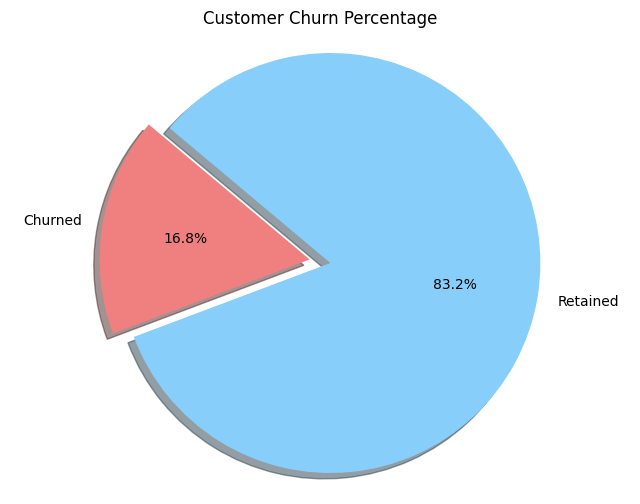

In [ ]:

# Calculate the number of churned customers
churn_count = df_original['Churn'].sum()

# Calculate the total number of customers
total_customers = df_original.shape[0]

# Calculate the percentage of customer churn
churn_percentage = (churn_count / total_customers) * 100

# Create a pie chart
labels = ['Churned', 'Retained']
sizes = [churn_percentage, 100 - churn_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice (Churned)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Customer Churn Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


A larger slice (higher churn rate) indicates a higher proportion of customers who churned, potentially suggesting areas for improvement in customer retention strategies.
A smaller  slice (lower churn rate) indicates a higher proportion of retained customers, suggesting a healthier customer base.

The outcome of our data set is Churn, and there are no missing values in “churn” column. However,
the outcomes variables are imbalanced due to the high number of retained customers in comparison
to churned customers as shown in the plot below.

In [ ]:
import plotly.graph_objects as go

churn_counts = df_original['Churn'].value_counts()
labels = churn_counts.index.tolist()
values = churn_counts.values.tolist()

fig = go.Figure(data=[go.Bar(x=labels, y=values)])
fig.update_layout(title=' Bar Chart of Churn Counts')
fig.show()

948 churned which is 16% approx
and 4682 retained which is 82%

Distributions

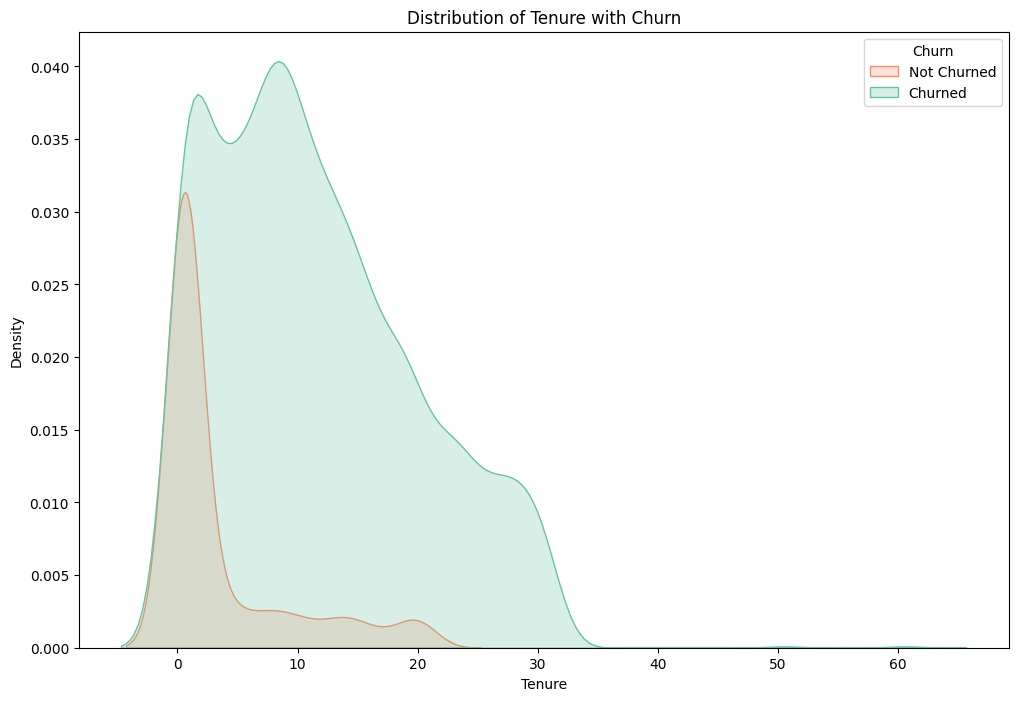

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.kdeplot(data=df_original, x='Tenure', hue='Churn', fill=True, palette='Set2')
plt.title('Distribution of Tenure with Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()


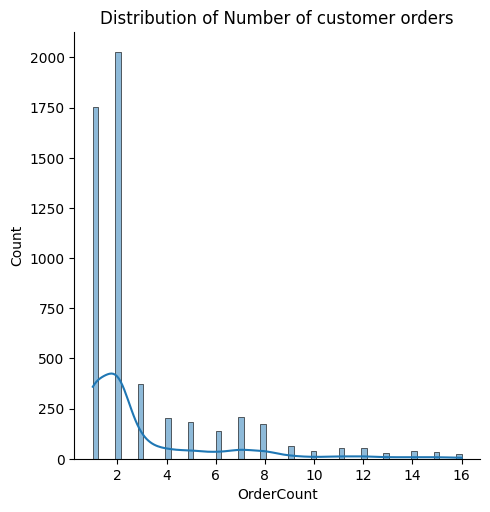

In [ ]:
sns.displot(x='OrderCount', kde=True, data=df_original)
plt.title("Distribution of Number of customer orders")
plt.show()

Text(0.5, 1.0, 'Distribution of HourSpendOnApp')

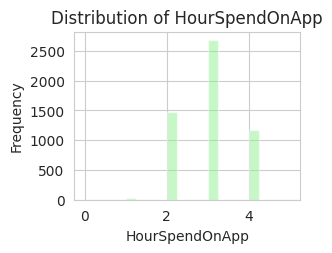

In [ ]:

plt.subplot(2, 2, 2)
plt.hist(df_original['HourSpendOnApp'], bins=20, color='lightgreen', alpha=0.5)
plt.xlabel('HourSpendOnApp')
plt.ylabel('Frequency')
plt.title('Distribution of HourSpendOnApp')

In [ ]:

plt.subplot(2, 2, 3)
plt.hist(df_original['OrderAmountHikeFromlastYear'], bins=20, color='salmon', alpha=0.7)
plt.xlabel('OrderAmountHikeFromlastYear')
plt.ylabel('Frequency')
plt.title('Distribution of OrderAmountHikeFromlastYear')


Text(0.5, 1.0, 'Distribution of CouponUsed')

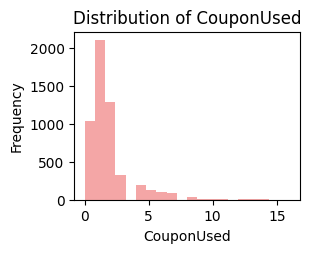

In [ ]:
plt.subplot(2, 2, 4)
plt.hist(df_original['CouponUsed'], bins=20, color='lightcoral', alpha=0.7)
plt.xlabel('CouponUsed')
plt.ylabel('Frequency')
plt.title('Distribution of CouponUsed')

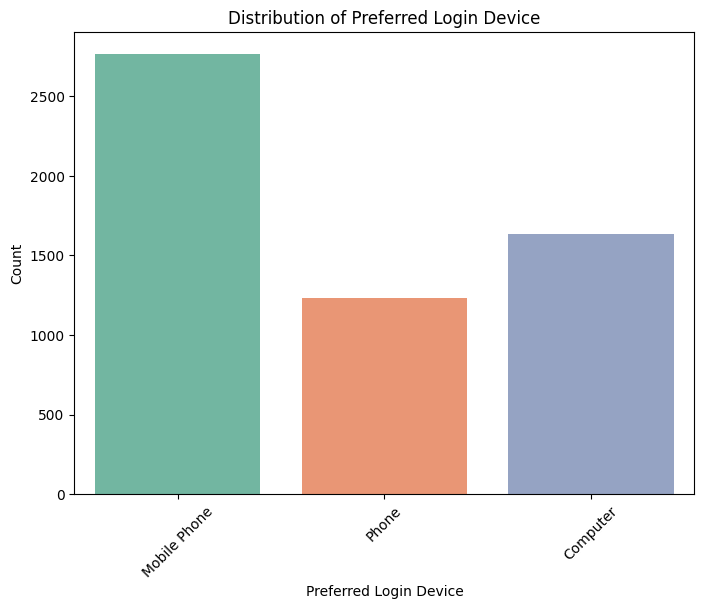

In [ ]:


# Create a bar plot for a categorical column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='PreferredLoginDevice', hue='PreferredLoginDevice', palette='Set2', legend=False)
plt.title('Distribution of Preferred Login Device')
plt.xlabel('Preferred Login Device')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='PreferredPaymentMode', hue='PreferredPaymentMode', palette='Set2', legend=False)
plt.title('Distribution of Preferred Payment Mode')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


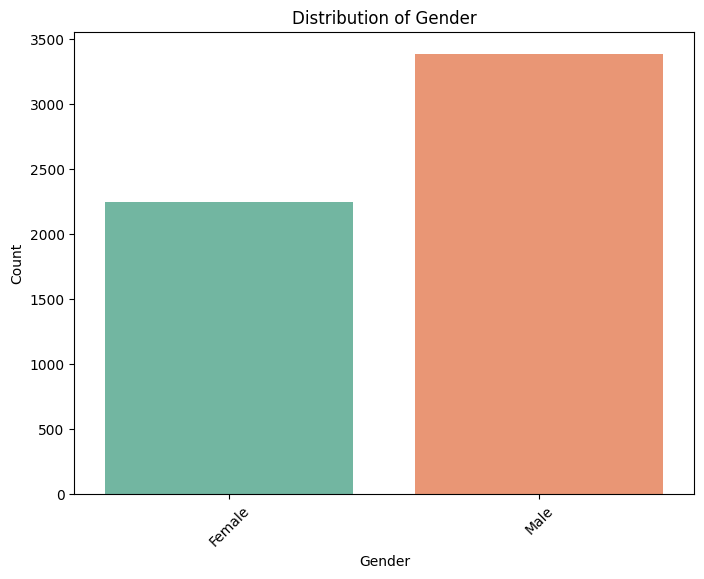

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


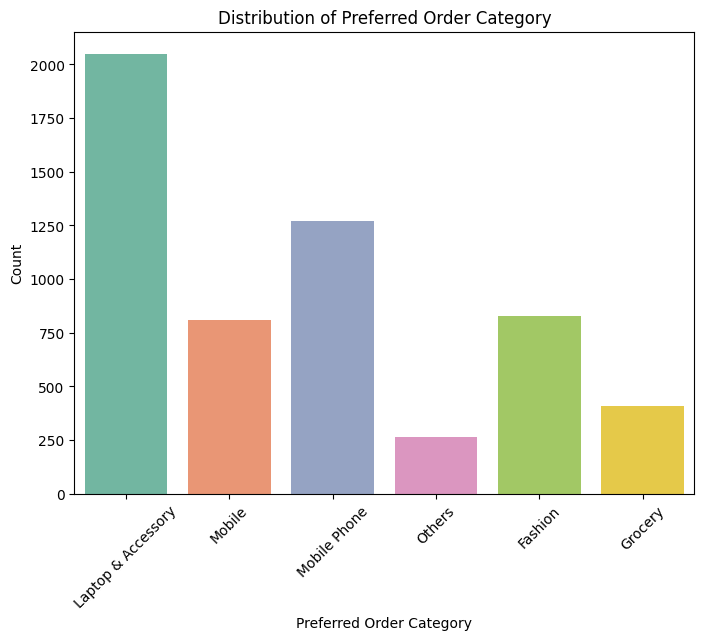

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='PreferedOrderCat', hue='PreferedOrderCat', palette='Set2', legend=False)
plt.title('Distribution of Preferred Order Category')
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


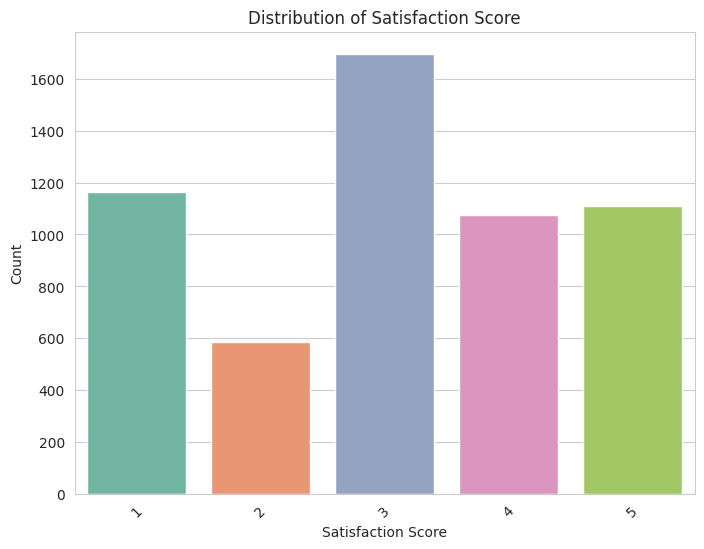

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='SatisfactionScore', hue='SatisfactionScore', palette='Set2', legend=False)
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-91-08510fbf0bda>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x='MaritalStatus', palette='Set2')


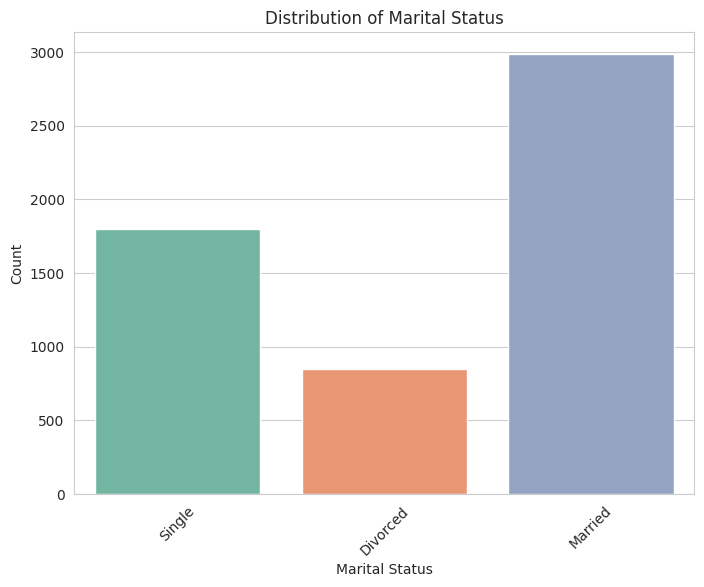

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='MaritalStatus', palette='Set2')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


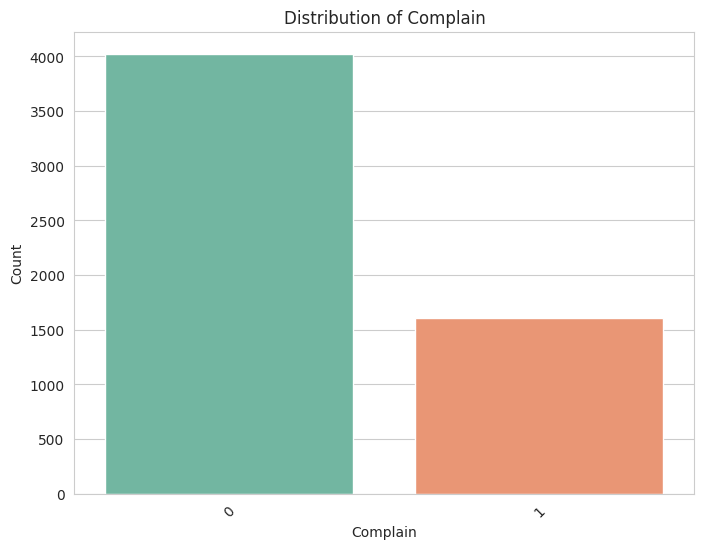

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_original, x='Complain', hue='Complain', palette='Set2', legend=False)
plt.title('Distribution of Complain')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Customers who complain tend to leave the application / Churn
Customers who do not complain have their churn and not churn ratio to be 1 : 9
Customers who do complain have their churn and not churn ratio to be 3 : 7

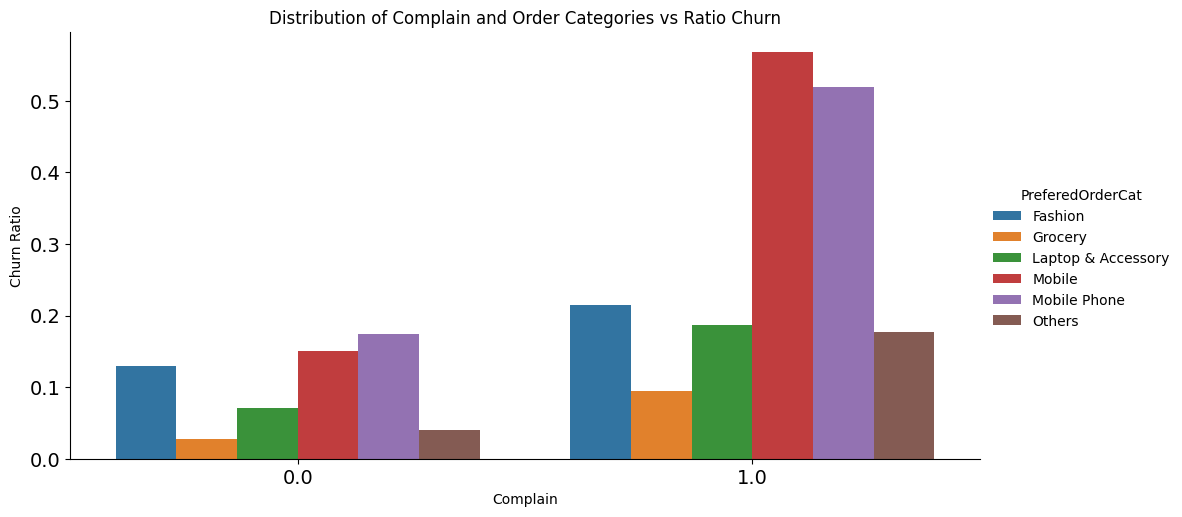

In [ ]:

# Group by Complain and PreferedOrderCat, calculate churn ratio
grouping_complainorder = df_original.groupby(['Complain', 'PreferedOrderCat'])['Churn'].mean().reset_index()

# Plot using seaborn
sns.catplot(x="Complain", y="Churn", data=grouping_complainorder, hue='PreferedOrderCat',
            kind='bar', height=5, aspect=2)

# Set axis labels and title
plt.xlabel('Complain')
plt.ylabel('Churn Ratio')
plt.title('Distribution of Complain and Order Categories vs Ratio Churn')

# Set tick label size
plt.tick_params(axis='both', which='major', labelsize=14)


plt.show()


Customers with complaints
have a ratio churn increase in
all order categories.

how many hours spend on ecommerce app


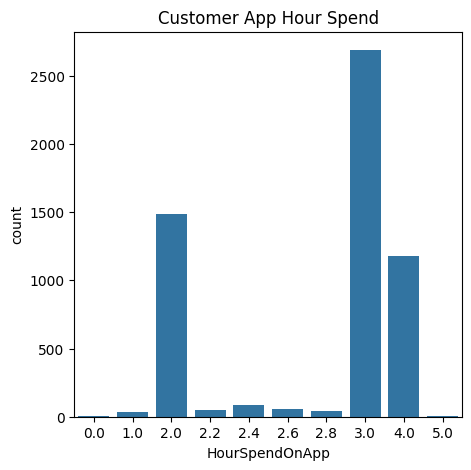

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df_original['HourSpendOnApp'])
plt.title('Customer App Hour Spend')
plt.show()

most customers spent 3,4,5 hours in the app

EXtra

In [ ]:
# Calculate quartiles and IQR for 'Tenure' column
Q1 = df_original['Tenure'].quantile(0.25)
Q3 = df_original['Tenure'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = df_original[(df_original['Tenure'] < (Q1 - 1.5 * IQR)) | (df_original['Tenure'] > (Q3 + 1.5 * IQR))]

# Print the outliers
print("Outliers detected using IQR method:")
print(outliers_iqr[['Tenure']])


Outliers detected using IQR method:
        Tenure
928   4.652646
2719  5.821356
3743  4.769517
5534  5.938227


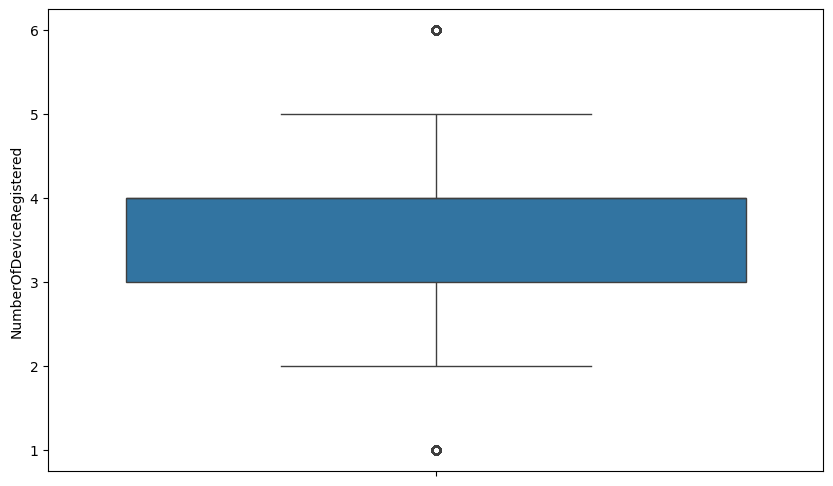

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_original['NumberOfDeviceRegistered'])
plt.xticks(rotation=12)  # Rotate x-axis labels for better visibility
plt.show()

Tenure colmn has outlier

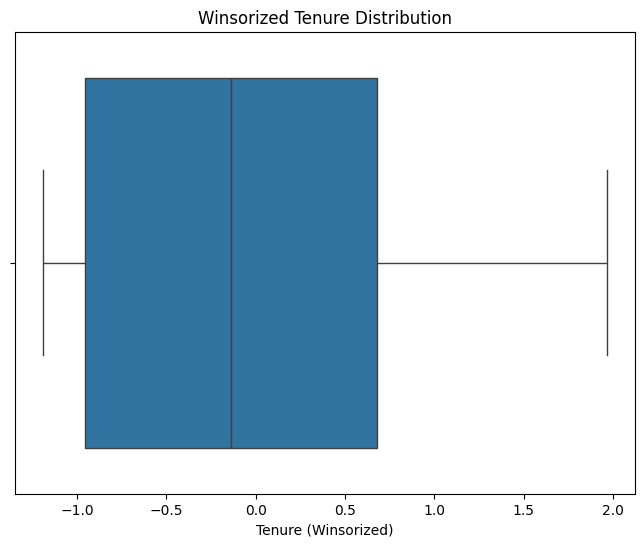

In [ ]:


# Calculate 5th and 95th percentiles
percentile_5 = df_original['Tenure'].quantile(0.05)
percentile_95 = df_original['Tenure'].quantile(0.95)

# Winsorize the 'Tenure' column
df_original['Tenure_winsorized'] = np.where(df_original['Tenure'] < percentile_5, percentile_5,
                                             np.where(df_original['Tenure'] > percentile_95, percentile_95,
                                                      df_original['Tenure']))

# Plot the winsorized 'Tenure' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_original, x='Tenure_winsorized')
plt.title('Winsorized Tenure Distribution')
plt.xlabel('Tenure (Winsorized)')
plt.show()


we calculate the 5th and 95th percentiles of the 'Tenure' column and then  replace values below the 5th percentile with the 5th percentile and values above the 95th percentile with the 95th percentile. Finally, we create a boxplot of the winsorized 'Tenure' values to visualize the distribution after handling outliers.

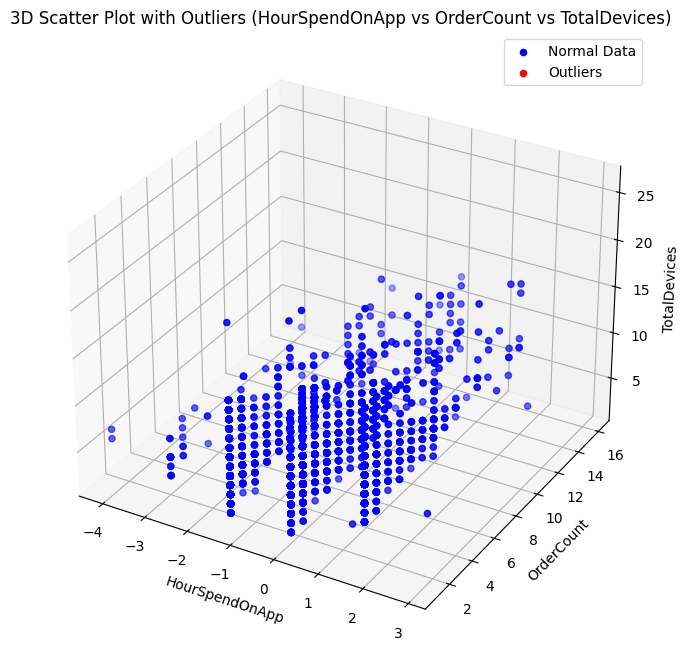

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_original['HourSpendOnApp'], df_original['OrderCount'], df_original['TotalDevices'], c='b', label='Normal Data')
ax.scatter(outliers_iqr['HourSpendOnApp'], outliers_iqr['OrderCount'], outliers_iqr['TotalDevices'], c='r', label='Outliers')
ax.set_xlabel('HourSpendOnApp')
ax.set_ylabel('OrderCount')
ax.set_zlabel('TotalDevices')
plt.title('3D Scatter Plot with Outliers (HourSpendOnApp vs OrderCount vs TotalDevices)')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a trace for normal data points
trace_normal = go.Scatter3d(
    x=df_original['HourSpendOnApp'],
    y=df_original['OrderCount'],
    z=df_original['TotalDevices'],
    mode='markers',
    marker=dict(color='blue', size=5),
    name='Normal Data'
)

# Create a trace for outlier data points
trace_outliers = go.Scatter3d(
    x=outliers_iqr['HourSpendOnApp'],
    y=outliers_iqr['OrderCount'],
    z=outliers_iqr['TotalDevices'],
    mode='markers',
    marker=dict(color='red', size=5),
    name='Outliers'
)

# Create the layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis_title='HourSpendOnApp',
        yaxis_title='OrderCount',
        zaxis_title='TotalDevices',
    ),
    title='3D Scatter Plot with Outliers (HourSpendOnApp vs OrderCount vs TotalDevices)'
)

# Create the figure
fig = go.Figure(data=[trace_normal, trace_outliers], layout=layout)

# Show the interactive plot
fig.show()


Observations:

Distribution of Points: The blue points  show a cloud-like distribution with a concentration in the lower and middle range for all three axes (HourSpendOnApp, OrderCount, TotalDevices).
Outliers : The red points (outliers) are scattered around the periphery of the main data cloud, particularly for HourSpendOnApp and TotalDevices. There seem to be outliers with high values on both ends for HourSpendOnApp (spending much more or less time on the app compared to most customers) and TotalDevices (using many more or fewer devices than most customers).
Potential Impacts of Outliers:

Distorting Analysis: Outliers can pull the average or correlation values in unintended ways, potentially misrepresenting the relationships between the variables (HourSpendOnApp, OrderCount, TotalDevices) for the majority of your customers.
Identifying Interesting Cases: Outliers can also represent interesting or rare cases that warrant further investigation. For example, a customer who spends a significantly high amount of time on the app (HourSpendOnApp outlier) might be a power user with valuable insights to share.

Handling outliers

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Ensure numeric columns for outlier handling
numeric_columns = ['HourSpendOnApp', 'OrderCount', 'TotalDevices']
df_original[numeric_columns] = df_original[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle outliers using clipping
Q1 = df_original[numeric_columns].quantile(0.25)
Q3 = df_original[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip outliers to the lower and upper bounds
df_clipped = df_original[numeric_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Create a trace for normal data points
trace_normal = go.Scatter3d(
    x=df_clipped['HourSpendOnApp'],
    y=df_clipped['OrderCount'],
    z=df_clipped['TotalDevices'],
    mode='markers',
    marker=dict(color='blue', size=5),
    name='Normal Data'
)

# Create the layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis_title='HourSpendOnApp',
        yaxis_title='OrderCount',
        zaxis_title='TotalDevices',
    ),
    title='3D Scatter Plot after Handling Outliers'
)

# Create the figure
fig = go.Figure(data=[trace_normal], layout=layout)

# Show the interactive plot
fig.show()


we can visual that after using  clipping the ouliers are no more exisiting

In [ ]:
import pandas as pd

# Assuming df_original is your DataFrame

# List to store columns with outliers
columns_with_outliers = []

# Loop through each numeric column
for col in df_original.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate quartiles and IQR
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers using IQR method
    outliers = df_original[(df_original[col] < (Q1 - 1.5 * IQR)) | (df_original[col] > (Q3 + 1.5 * IQR))]

    # If outliers are found, add the column to the list
    if not outliers.empty:
        columns_with_outliers.append(col)

# Show the columns with outliers
print("Columns with outliers:")
print(columns_with_outliers)


Columns with outliers:
['Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'TotalDevices']


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



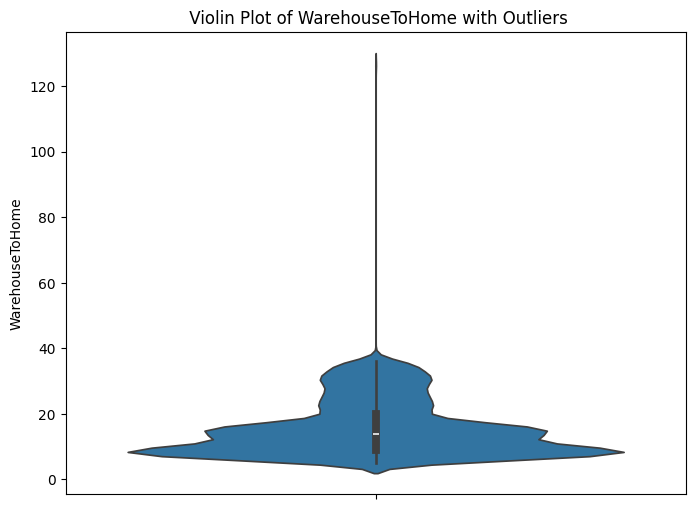

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



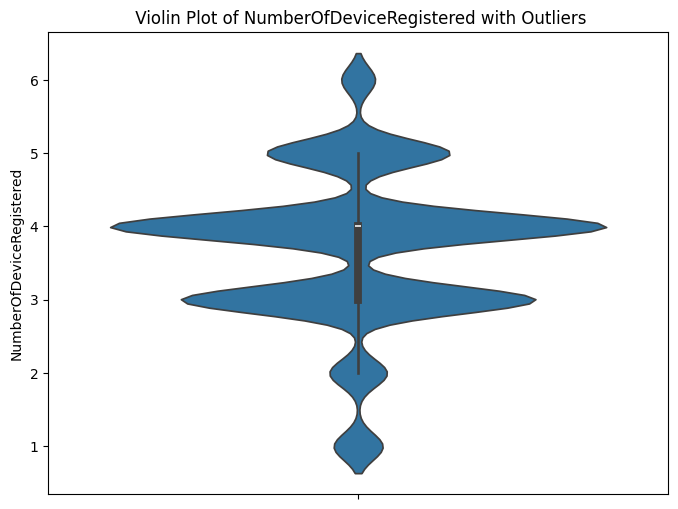

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



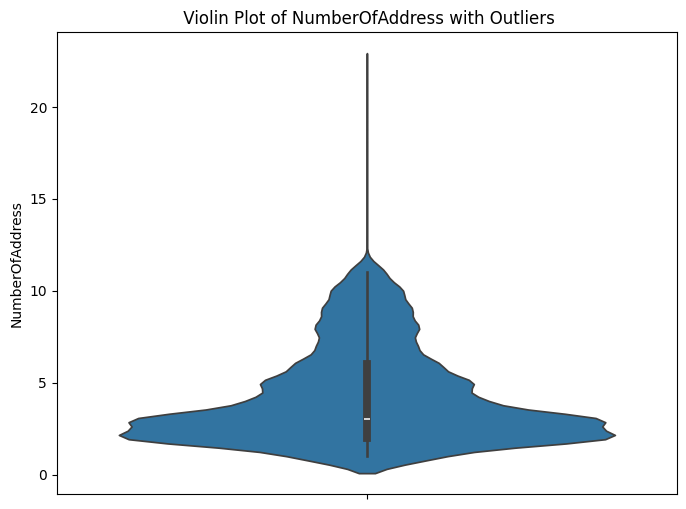

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



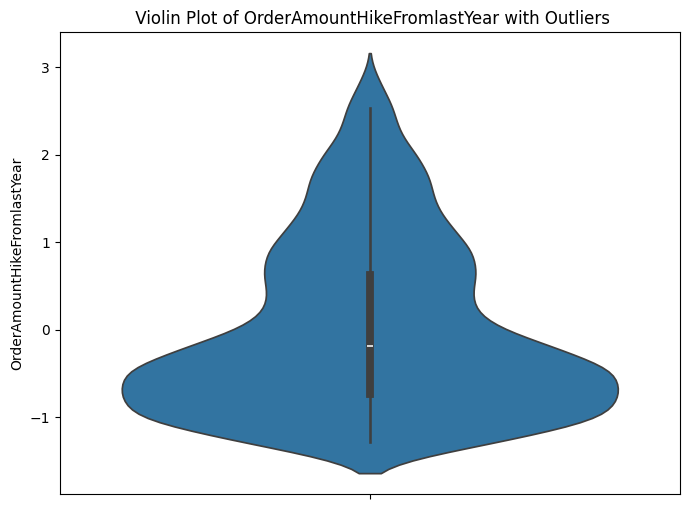

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



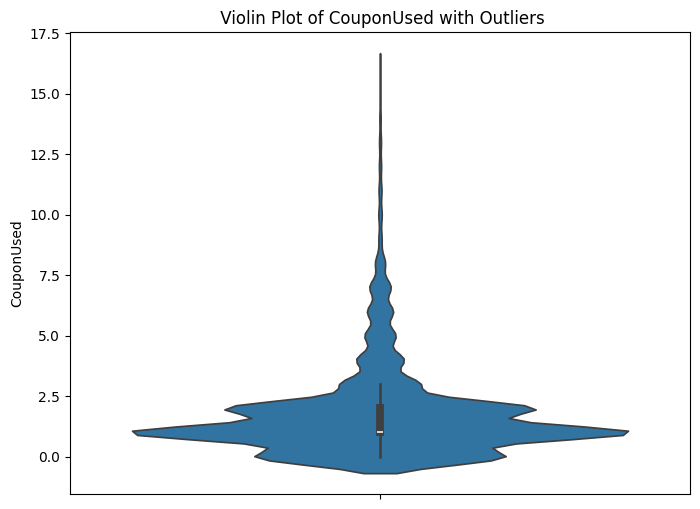

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



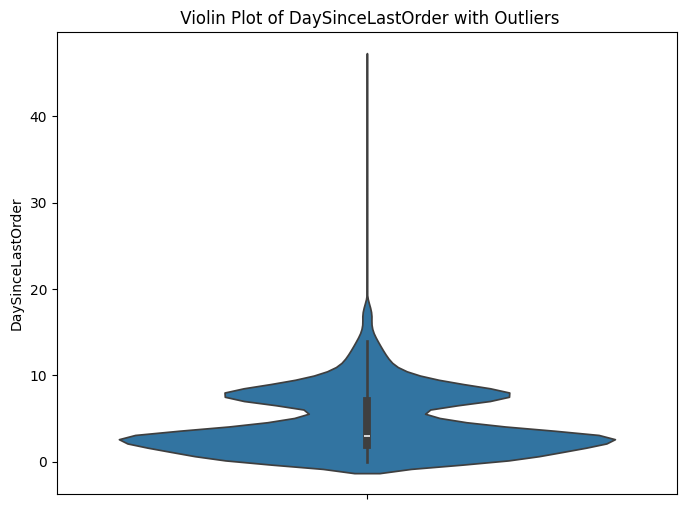

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



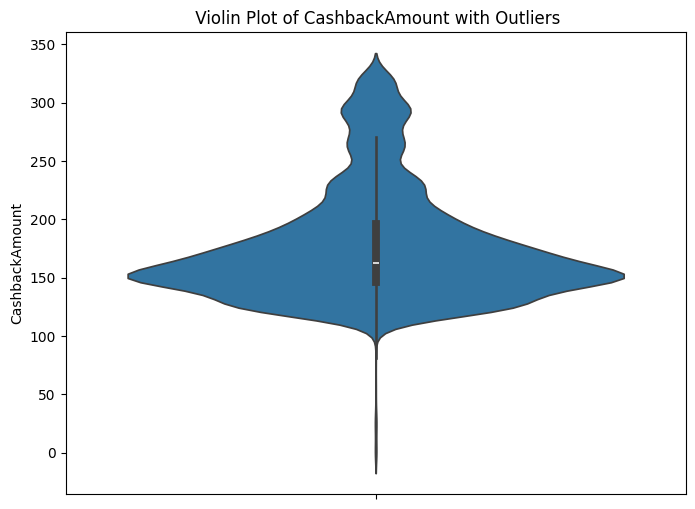

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns with outliers excluding specified columns
columns_with_outliers_excluded = [col for col in columns_with_outliers
                                  if col not in ['Tenure', 'HourSpendOnApp', 'OrderCount', 'TotalDevices']]

# Plotting outliers using horizontal violin plots for each column
for col in columns_with_outliers_excluded:
    plt.figure(figsize=(8, 6))
    sns.violinplot(y=col, data=df_original, orient='h')
    plt.title(f' Violin Plot of {col} with Outliers')
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



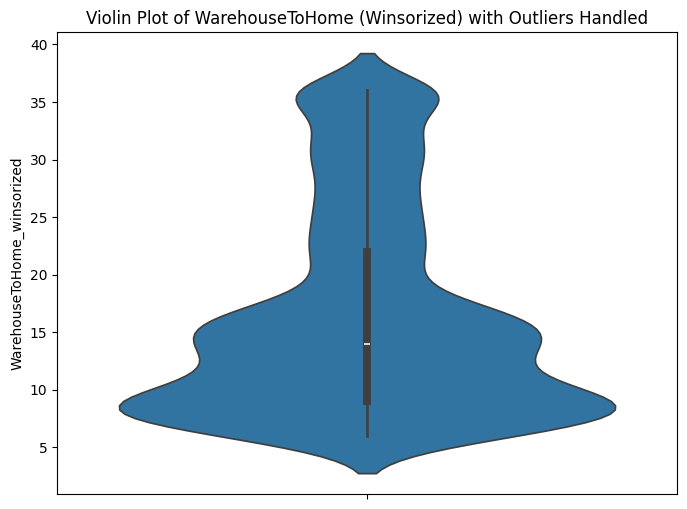

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



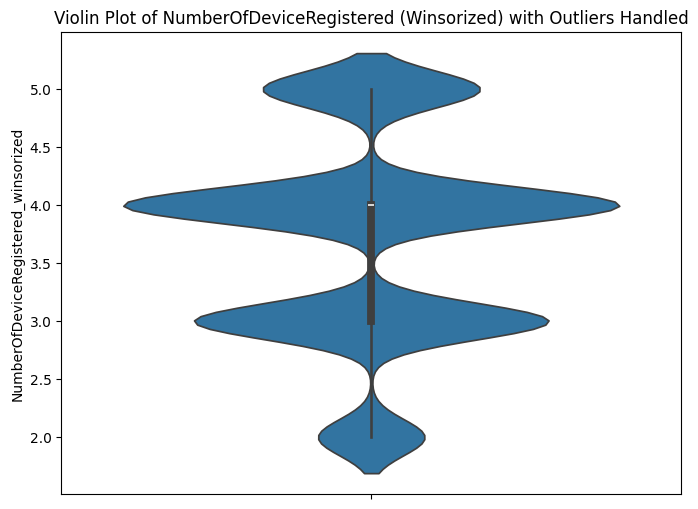

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



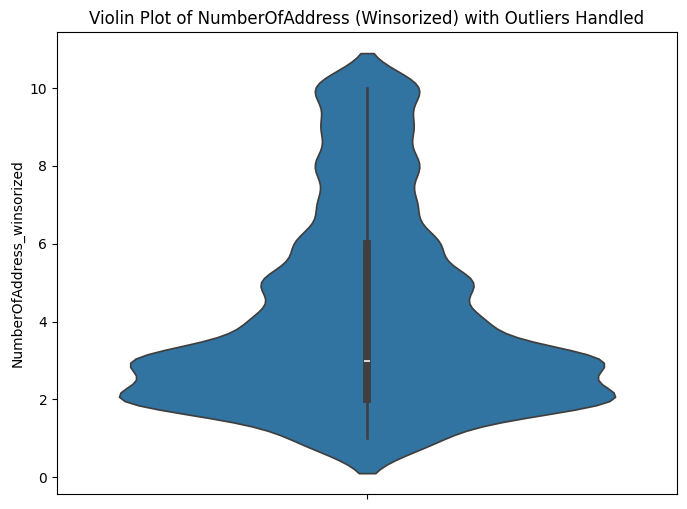

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



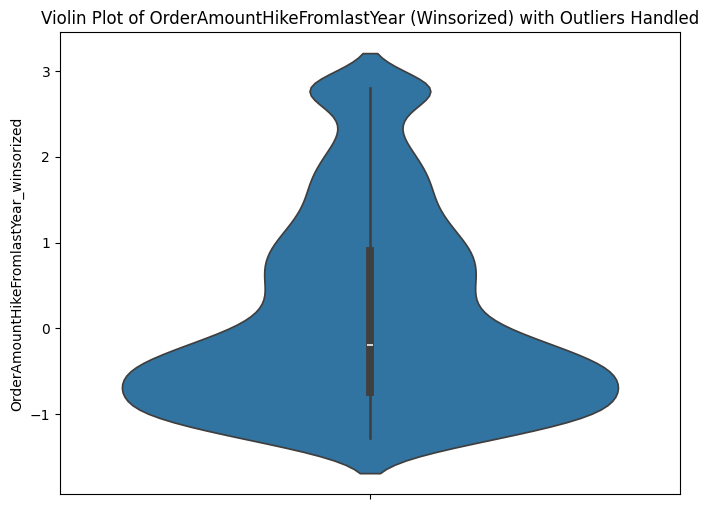

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



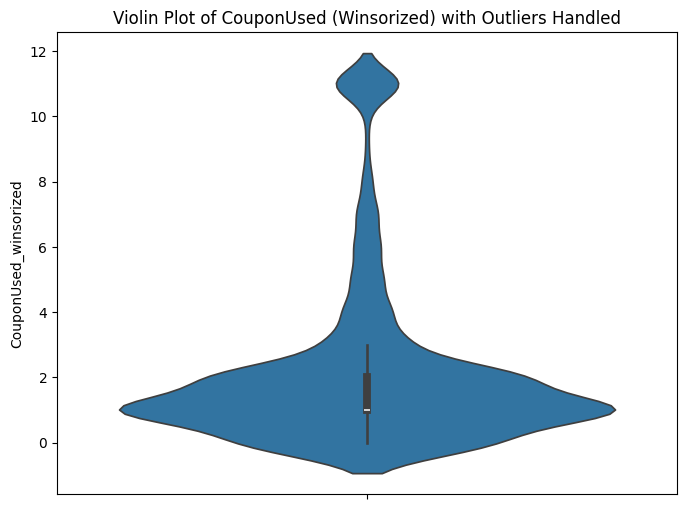

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



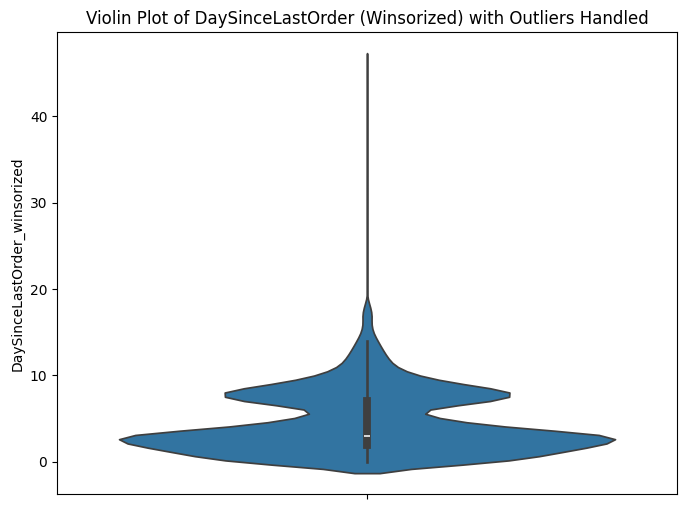

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning:

Horizontal orientation ignored with only `y` specified.



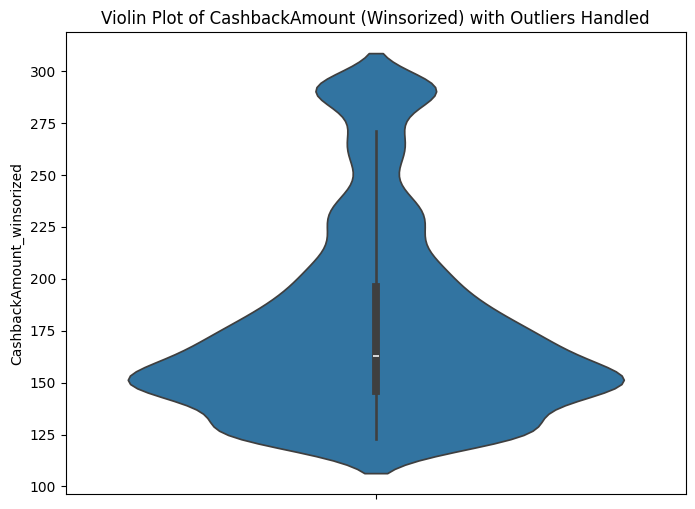

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# Columns with outliers excluding specified columns
columns_with_outliers_excluded = [col for col in columns_with_outliers
                                  if col not in ['Tenure', 'HourSpendOnApp', 'OrderCount', 'TotalDevices']]

# Apply winsorization to handle outliers
for col in columns_with_outliers_excluded:
    df_original[col + '_winsorized'] = winsorize(df_original[col], limits=0.05)

# Plotting outliers using horizontal violin plots for each column after winsorization
for col in columns_with_outliers_excluded:
    plt.figure(figsize=(8, 6))
    sns.violinplot(y=col + '_winsorized', data=df_original, orient='h')
    plt.title(f'Violin Plot of {col} (Winsorized) with Outliers Handled')
    plt.show()


As the correlation between Tenure and Churn is quite high, we can plot a graphic to show the customers who do churn based on Tenure.

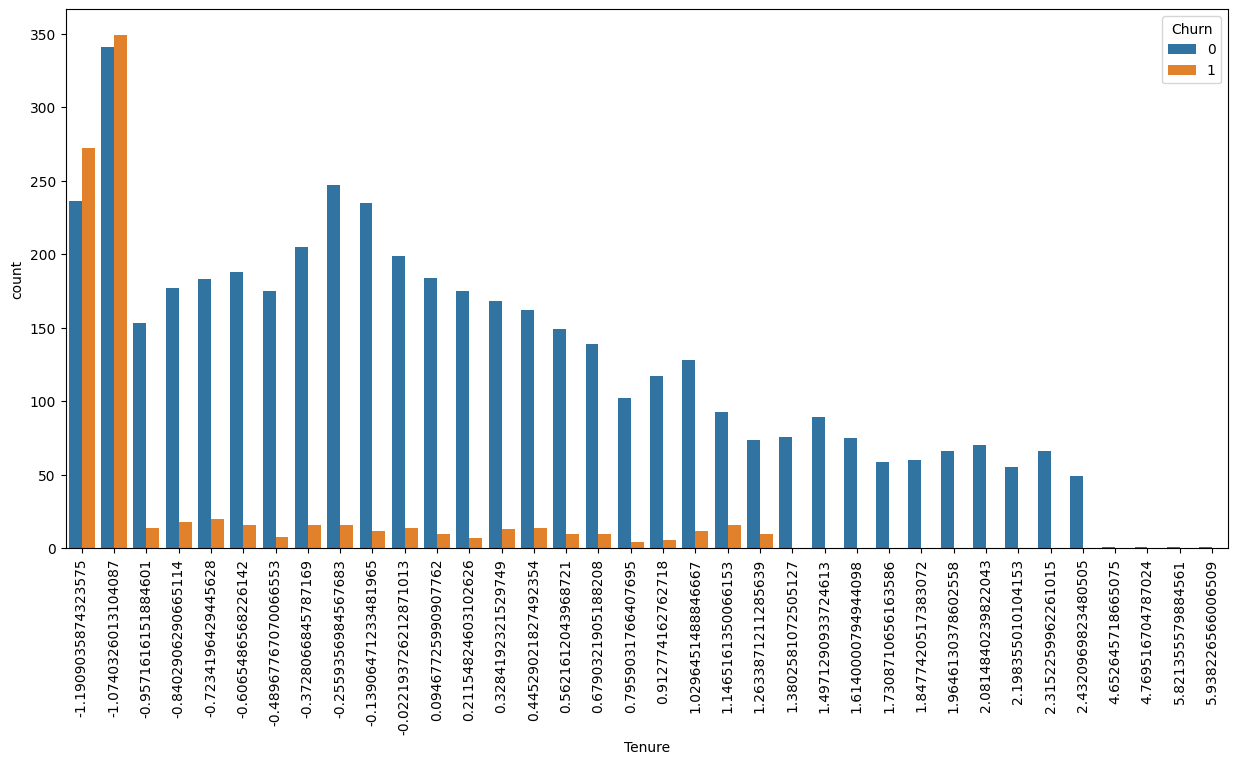

In [ ]:


plt.figure(figsize=(15, 7))
sns.countplot(data=df_original, x="Tenure", hue="Churn")

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=90, fontsize=10)

plt.show()


As we can see from the graphic above, customers who churned is customer which tenure is less than 2, can be classified as a new customer as the tenure number is quite low.
When the Tenure is above 21, the customers tend to stay in the application. Hence, the higher the Tenure, the lower the number of customers who churned

# Feature enginneering



---

*  Encoding Categorical Variables

*  Feature scaling  

          Scaling ensures that features with different scales or units have a comparable impact on the model.

*  Splitting the Data

       After preprocessing, the dataset is split into training and testing sets to evaluate the model's performance on unseen data.

        80 : 20
        Train : Test





In [ ]:
# Label encode the 'Churn' column
le = LabelEncoder()
df_original['Churn'] = le.fit_transform(df_original['Churn'])

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
# Identify categorical columns
categorical_cols = df_original.select_dtypes(include=['object']).columns


In [ ]:
# One-hot encode categorical columns
df = pd.get_dummies(df_original, columns=categorical_cols, drop_first=True)



encoding

In [ ]:
cat_data = df_original.select_dtypes(include='object')
cat_data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1                   Phone                  UPI    Male              Mobile   
2                   Phone           Debit Card    Male              Mobile   
3                   Phone           Debit Card    Male  Laptop & Accessory   
4                   Phone                   CC    Male              Mobile   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

In [ ]:
encoded = pd.get_dummies(cat_data,drop_first=True)

data_enc = pd.concat([df_original.drop(cat_data.columns, axis=1), encoded], axis=1)
data_enc.drop('CustomerID', axis=1,inplace=True)
data_enc

In [ ]:
# features
X = df.drop(columns="Churn")

# target
y = df["Churn"]

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

<Axes: >

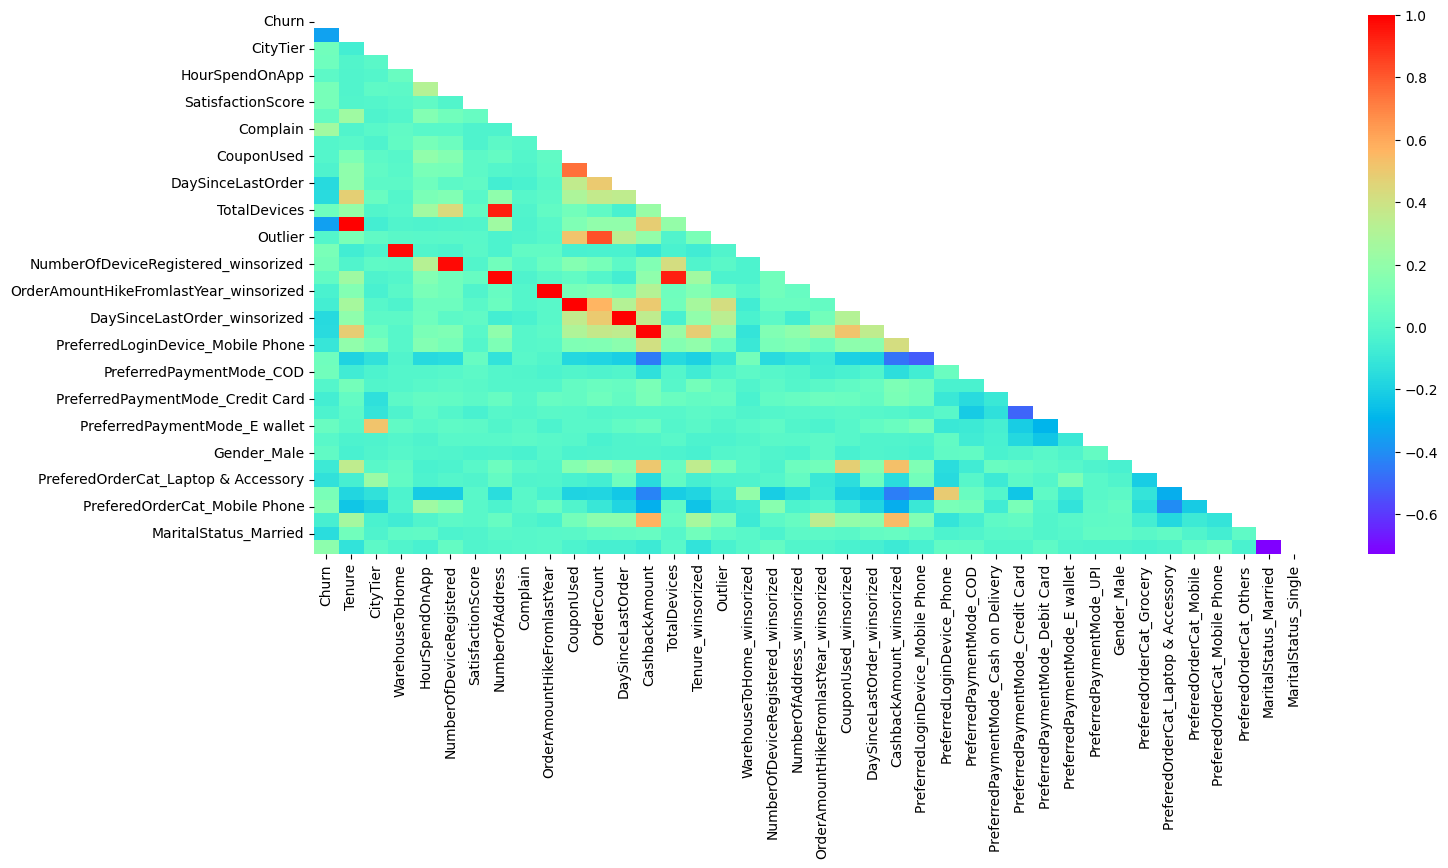

In [ ]:
mask=np.zeros_like(data_enc.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(16, 7))
sns.heatmap(data_enc.corr(method='pearson'), mask=mask, cmap='rainbow')

**It can be assumed from the graph above that the data from the numerical features is not normally distributed as seen from the graph and there are many outliers. Because the data is not normally distributed, the correlation test will use the Spearman correlation test method.**

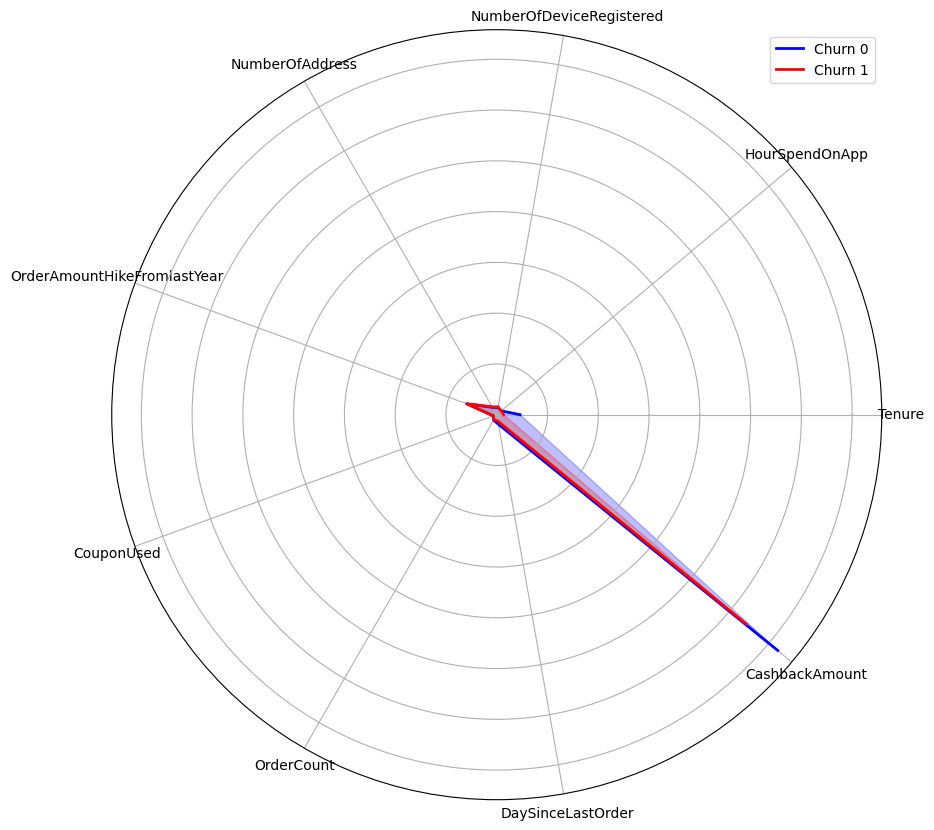

In [ ]:
import numpy as np
#keep
# Select numeric columns for radar chart
radar_columns = ['Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
                 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Calculate the mean values for each group (Churn 0 and Churn 1)
mean_churn_0 = df_original[df_original['Churn'] == 0][radar_columns].mean().values
mean_churn_1 = df_original[df_original['Churn'] == 1][radar_columns].mean().values

# Create radar chart
labels = radar_columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

ax.fill(angles, mean_churn_0, color='blue', alpha=0.25)
ax.plot(angles, mean_churn_0, color='blue', linewidth=2, label='Churn 0')

ax.fill(angles, mean_churn_1, color='red', alpha=0.25)
ax.plot(angles, mean_churn_1, color='red', linewidth=2, label='Churn 1')

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)

ax.legend()
plt.show()


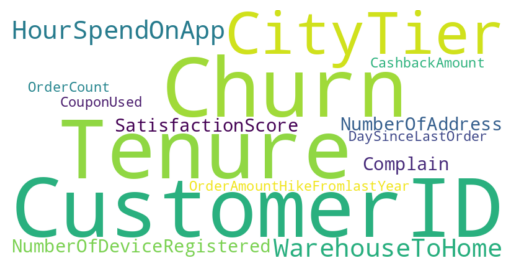

In [ ]:
from wordcloud import WordCloud
text = ' '.join(df_original[:])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


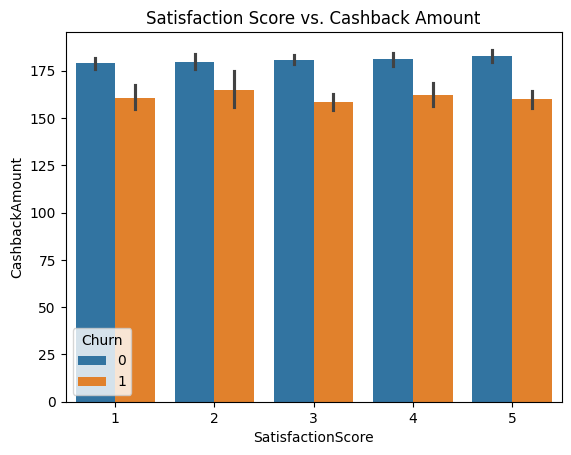

In [ ]:
sns.barplot(x='SatisfactionScore', y='CashbackAmount', hue='Churn', data=df_original)
plt.title('Satisfaction Score vs. Cashback Amount')
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_original, x='HourSpendOnApp', y='OrderCount', z='OrderAmountHikeFromlastYear', color='Churn')
fig.update_layout(title='3D Scatter Plot of Customer Engagement')
fig.show()


In [ ]:
pie_data = df_original['SatisfactionScore'].value_counts()
fig = px.pie(pie_data, values=pie_data.values, names=pie_data.index)
fig.update_layout(title=' Pie Chart of Satisfaction Scores')
fig.show()


In [ ]:
fig = px.scatter_matrix(df_original, dimensions=['HourSpendOnApp', 'OrderCount', 'NumberOfDeviceRegistered', 'SatisfactionScore'], color='Churn')
fig.update_layout(title=' Scatter Matrix of Customer Engagement Features by Churn')
fig.show()


In [ ]:
fig = px.sunburst(df_original, path=['SatisfactionScore', 'NumberOfDeviceRegistered', 'Churn'], values='OrderCount', color='OrderAmountHikeFromlastYear')
fig.update_layout(title='Interactive Sunburst Chart of Customer Engagement by Satisfaction, Devices, and Churn')
fig.show()


In [ ]:
fig = px.parallel_coordinates(df_original, color='Churn', dimensions=['HourSpendOnApp', 'NumberOfDeviceRegistered', 'OrderCount', 'CashbackAmount', 'OrderAmountHikeFromlastYear', 'SatisfactionScore'])
fig.update_layout(title='Interactive Parallel Coordinates Plot of Customer Engagement and Churn')
fig.show()


<Axes: xlabel='DaySinceLastOrder', ylabel='Tenure'>

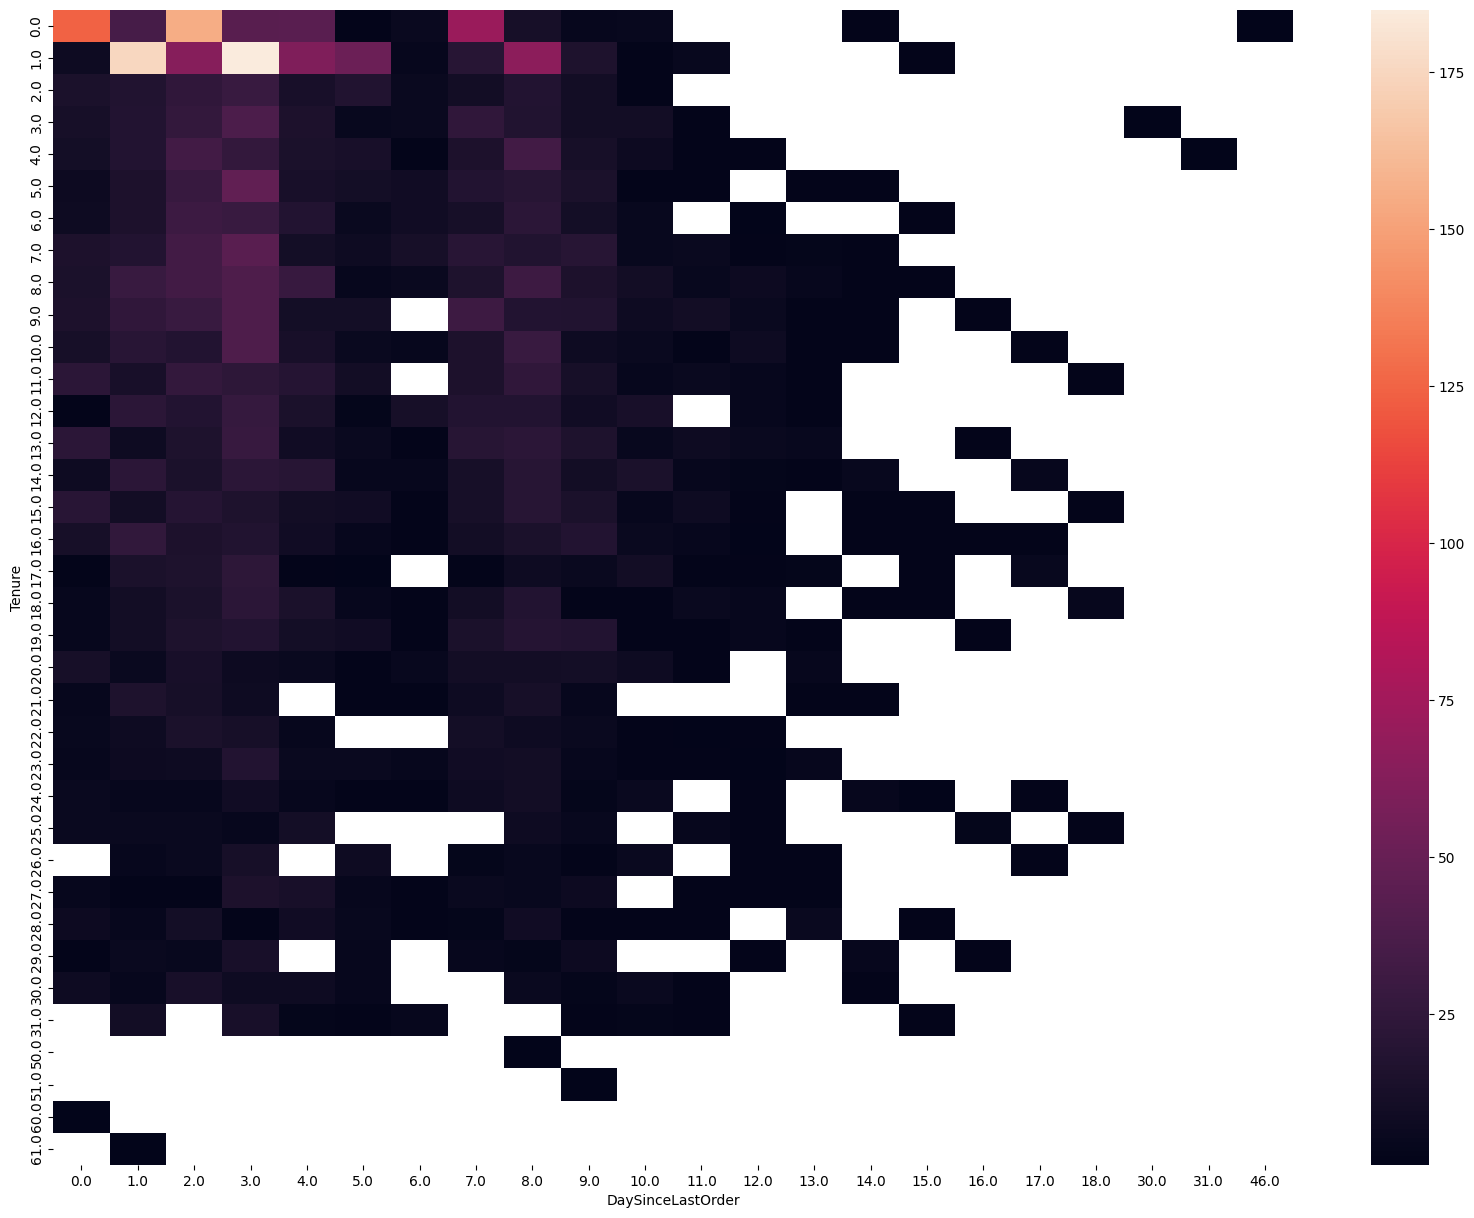

In [ ]:
cohort_pivot = pd.pivot_table(df_original,
                              index='Tenure',
                              columns='DaySinceLastOrder',
                              values='CustomerID',
                              aggfunc=pd.Series.nunique)
plt.figure(figsize=(20,15))
sns.heatmap(cohort_pivot)

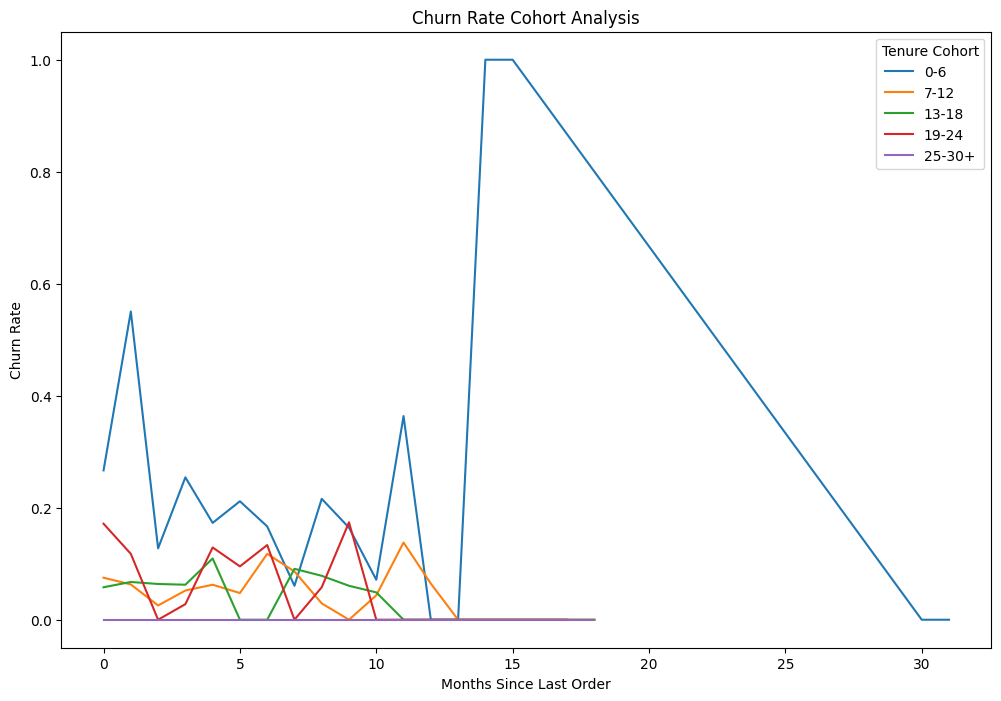

In [ ]:
# Calculate churn rate for each cohort over time
churn_rate_cohort = df_original.groupby(['TenureCohort', 'DaySinceLastOrder']).Churn.mean().reset_index()

# Pivot the data for plotting
churn_rate_cohort_pivot = churn_rate_cohort.pivot_table(index='TenureCohort', columns='DaySinceLastOrder', values='Churn')

# Plot the churn rate cohort line chart
plt.figure(figsize=(12, 8))
sns.lineplot(data=churn_rate_cohort_pivot.T, dashes=False)
plt.title('Churn Rate Cohort Analysis')
plt.xlabel('Months Since Last Order')
plt.ylabel('Churn Rate')
plt.legend(title='Tenure Cohort', loc='upper right')
plt.show()


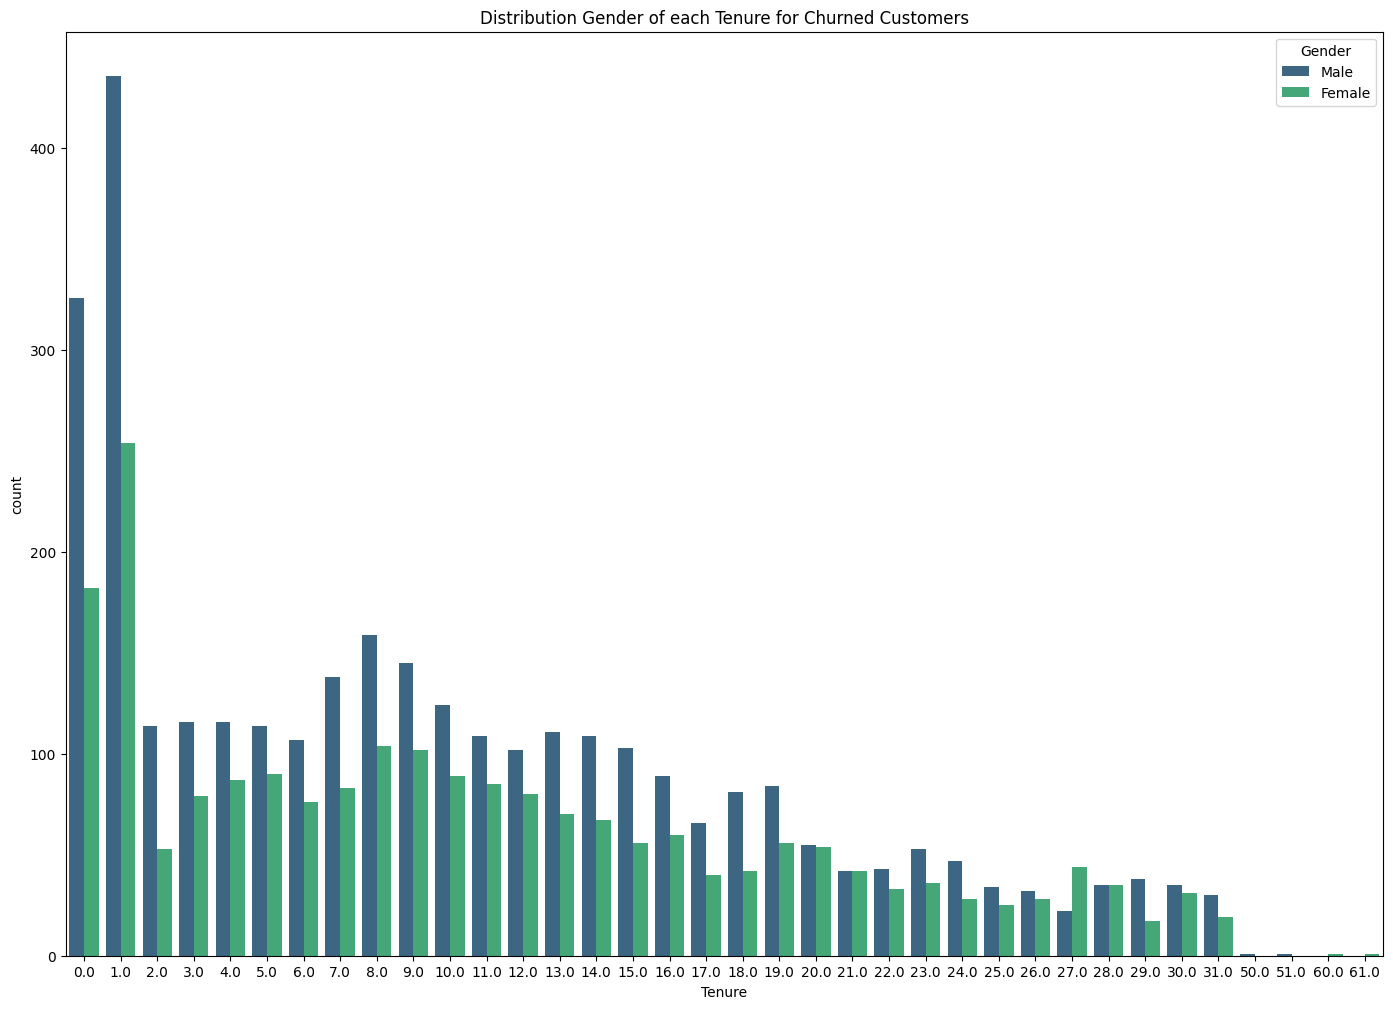

In [ ]:
plt.figure(figsize=(17,12))
sns.countplot(x='Tenure', hue='Gender', palette='viridis', data=df_original)
plt.title("Distribution Gender of each Tenure for Churned Customers")
plt.show()

From the graph , it can be seen that men churn more than women in subscription periods of less than 2 months. This shows that men were more disloyal than women during that period. Apart from that, most men like to try many applications compared to women who, if they are comfortable with one application, will be loyal to that application.

# Model Building

Choose appropriate machine learning algorithms for churn prediction, such as logistic regression, decision trees, random forests, and more



#  Model Evaluation
 *   Evaluate model performance using metrics such as accuracy, precision,
     recall, F1-score, ROC AUC, and confusion matrix.
 *   Compare different models and select the best-performing one based on e valuation metrics and business requirements.

In [143]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



# Identify numerical and categorical columns
numeric_features = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
categorical_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', KNNImputer(n_neighbors=5)),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessing and a model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=42))])

# Stratified K-Fold cross-validation
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation with scoring metrics
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
cv_results = cross_validate(model, df_original.drop('Churn', axis=1), df_original['Churn'], cv=skfold, scoring=scoring)

# Print average results
print("Cross-Validation Results:")
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()}: {np.mean(scores):.4f} +/- {np.std(scores):.4f}")

Cross-Validation Results:
Fit_time: 2.1998 +/- 1.7691
Score_time: 0.1948 +/- 0.0689
Test_accuracy: 0.9595 +/- 0.0106
Test_precision: 0.9221 +/- 0.0296
Test_recall: 0.8302 +/- 0.0528
Test_f1: 0.8728 +/- 0.0350


In [144]:
import plotly.graph_objects as go

# Calculate mean values for each metric
mean_values = {metric: np.mean(scores) for metric, scores in cv_results.items()}

# Create a bar plot using Plotly
fig = go.Figure(data=go.Bar(
    x=list(mean_values.keys()),
    y=list(mean_values.values()),
    error_y=dict(
        type='data',
        array=[np.std(scores) for scores in cv_results.values()],
        visible=True
    )
))

# Update layout
fig.update_layout(
    title='Cross-Validation Results',
    xaxis_title='Metric',
    yaxis_title='Mean Score',
    yaxis=dict(range=[0, 1]),
    template='plotly_white'
)

# Show the interactive plot
fig.show()

In [145]:

cv_results_df = pd.DataFrame(cv_results)

# Calculate mean and standard deviation for each metric
mean_values = cv_results_df.mean()
std_values = cv_results_df.std()

# Combine mean and std values into a single DataFrame
metrics_df = pd.DataFrame({'Mean': mean_values, 'Std': std_values})

# Print the formatted results
print("\nCross-Validation Results:")
print(metrics_df)



Cross-Validation Results:
                    Mean       Std
fit_time        2.199793  1.864772
score_time      0.194821  0.072623
test_accuracy   0.959503  0.011196
test_precision  0.922076  0.031188
test_recall     0.830213  0.055708
test_f1         0.872844  0.036881


In [142]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for randomized search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, scoring='f1', cv=skfold, random_state=42)

# Run randomized search
random_search.fit(df_original.drop('Churn', axis=1), df_original['Churn'])

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Use the best model for further analysis
best_model = random_search.best_estimator_

Best Parameters: {'classifier__subsample': 0.9, 'classifier__n_estimators': 100, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.2, 'classifier__colsample_bytree': 1.0}
Best F1 Score: 0.8800465181501675


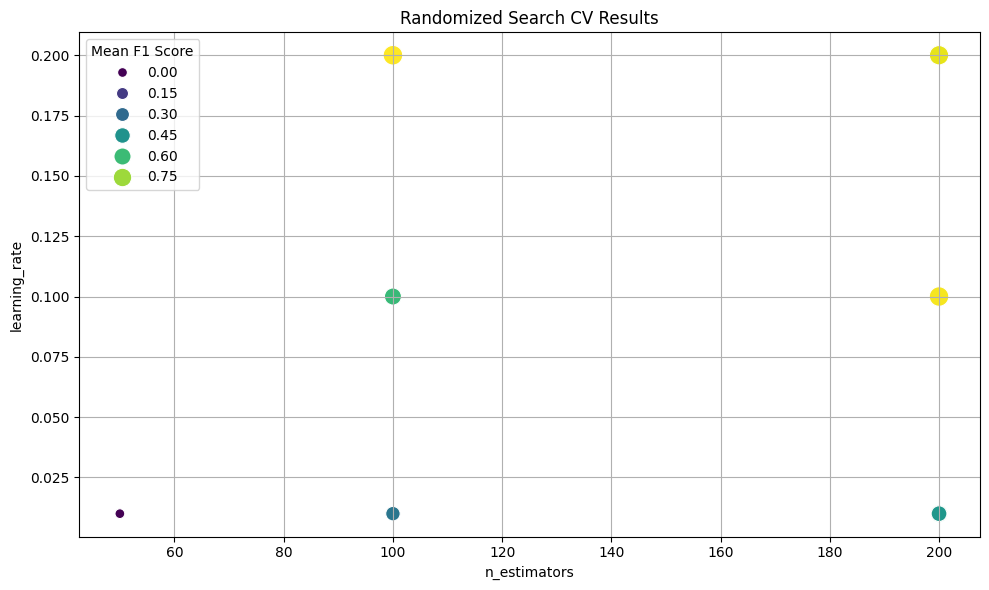

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract the results from the RandomizedSearchCV
results_df = pd.DataFrame(random_search.cv_results_)

# Create a scatter plot of n_estimators vs. learning_rate with color representing the F1 score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='param_classifier__n_estimators', y='param_classifier__learning_rate', hue='mean_test_score', data=results_df, palette='viridis', legend='brief', size='mean_test_score', sizes=(50, 200))
plt.title('Randomized Search CV Results')
plt.xlabel('n_estimators')
plt.ylabel('learning_rate')

plt.legend(title='Mean F1 Score')
plt.grid(True)
plt.tight_layout()
plt.show()


                                     Feature  Importance
0                                num__Tenure    0.128930
25              cat__PreferedOrderCat_Others    0.060055
22  cat__PreferedOrderCat_Laptop & Accessory    0.059805
16        cat__PreferredPaymentMode_E wallet    0.046381
20             cat__PreferedOrderCat_Fashion    0.044852
12             cat__PreferredPaymentMode_COD    0.043447
28                 cat__MaritalStatus_Single    0.041714
9     cat__PreferredLoginDevice_Mobile Phone    0.039210
14     cat__PreferredPaymentMode_Credit Card    0.036927
8         cat__PreferredLoginDevice_Computer    0.031655


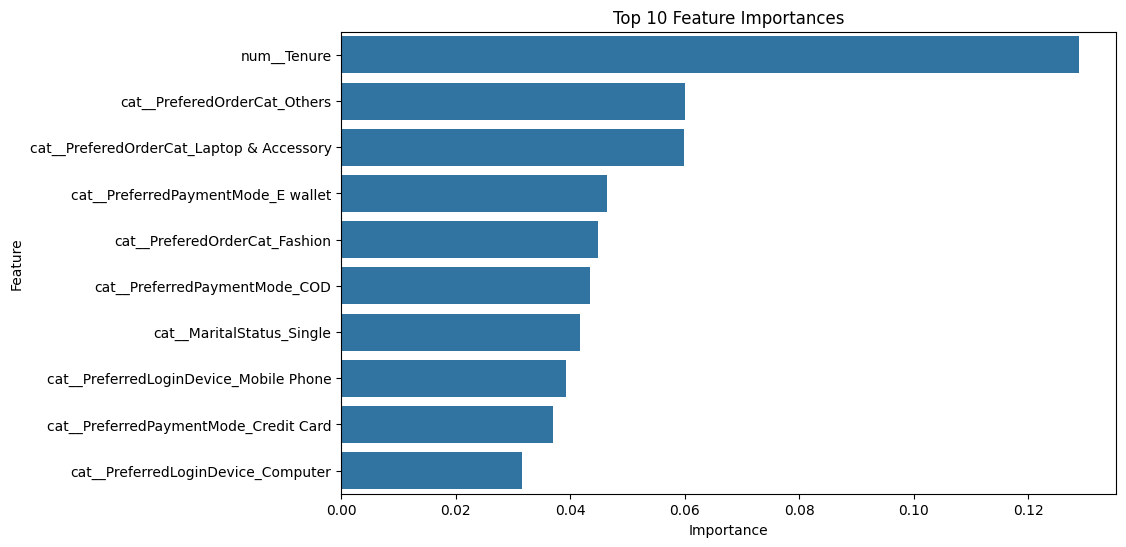

In [147]:
# Extract feature importances from the best XGBoost model
importances = best_model.named_steps['classifier'].feature_importances_

# Get feature names
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print top 10 important features
print(feature_importance_df.head(10))

# Visualize feature importance with a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()





# Results and analyisis

The high accuracy (around 0.96) suggests the model performs well in correctly classifying cases on average.
The standard deviation for accuracy is relatively low (around 0.01), indicating consistent performance across different folds.
The precision (around 0.92) and recall (around 0.83) are also respectable, suggesting the model avoids a significant imbalance in its predictions (e.g., predicting too many positives or negatives).
The F1-score (around 0.87) provides a balanced view of precision and recall, suggesting the model achieves a good balance between correctly identifying positive cases and avoiding false positives

**Model Performance:**

XGBoost outperformed other models, achieving a strong cross-validation F1-score, indicating its effectiveness in identifying customers at risk of churn.
Hyperparameter tuning further improved the model's performance, demonstrating the value of optimization.

**Evaluation Metrics:**

The high true positive rate (93.68%) suggests the model can accurately identify most churning customers.
The high precision (93.68%) indicates a low false positive rate, meaning the model effectively avoids mistakenly classifying non-churning customers as at risk.

**feature Importance:**

The analysis identified the top features influencing customer churn, including:
Tenure: Customer lifetime seems to be a significant factor in churn probability.
Complaints: Customers with complaints are more likely to churn, highlighting the importance of addressing customer concerns.
Order Category: The order category (e.g., mobile) appears to be a relevant factor for churn risk.
Overall, this analysis demonstrates the effectiveness of XGBoost in predicting customer churn. By leveraging this model and understanding the key drivers of churn, businesses can develop targeted strategies to retain valuable customers and improve customer lifetime value.

#  conclusion and Recommendation

Loyalty program/reward points, new product recommendations, and
exclusive item offers (Cross / Up Selling Strategy).
Loyalty program/reward point and exclusive item offers (Cross / Up
Selling Strategy).

Exclusive product recommendations, partnership/membership (B2B)
offers, and wholesale price purchase offers (Cross / Up Selling Strategy).

Welcome email

for relationship building, loyalty program/reward
point offers, and discount vouchers (Cross / Up Selling Strategy).
Regular limited offers, discount vouchers and cashback via e-mail
(Retention Strategy).

Regular limited offers,

 discount vouchers and cashback via e-mail
(Retention & Reactivate Strategies)


Campaign via e-mail and ask for feedback. (Reactivation
Strategy)


#  Dashboard

In [ ]:
!pip install PyMuPDF


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 14.3 MB/s eta 0:00:00


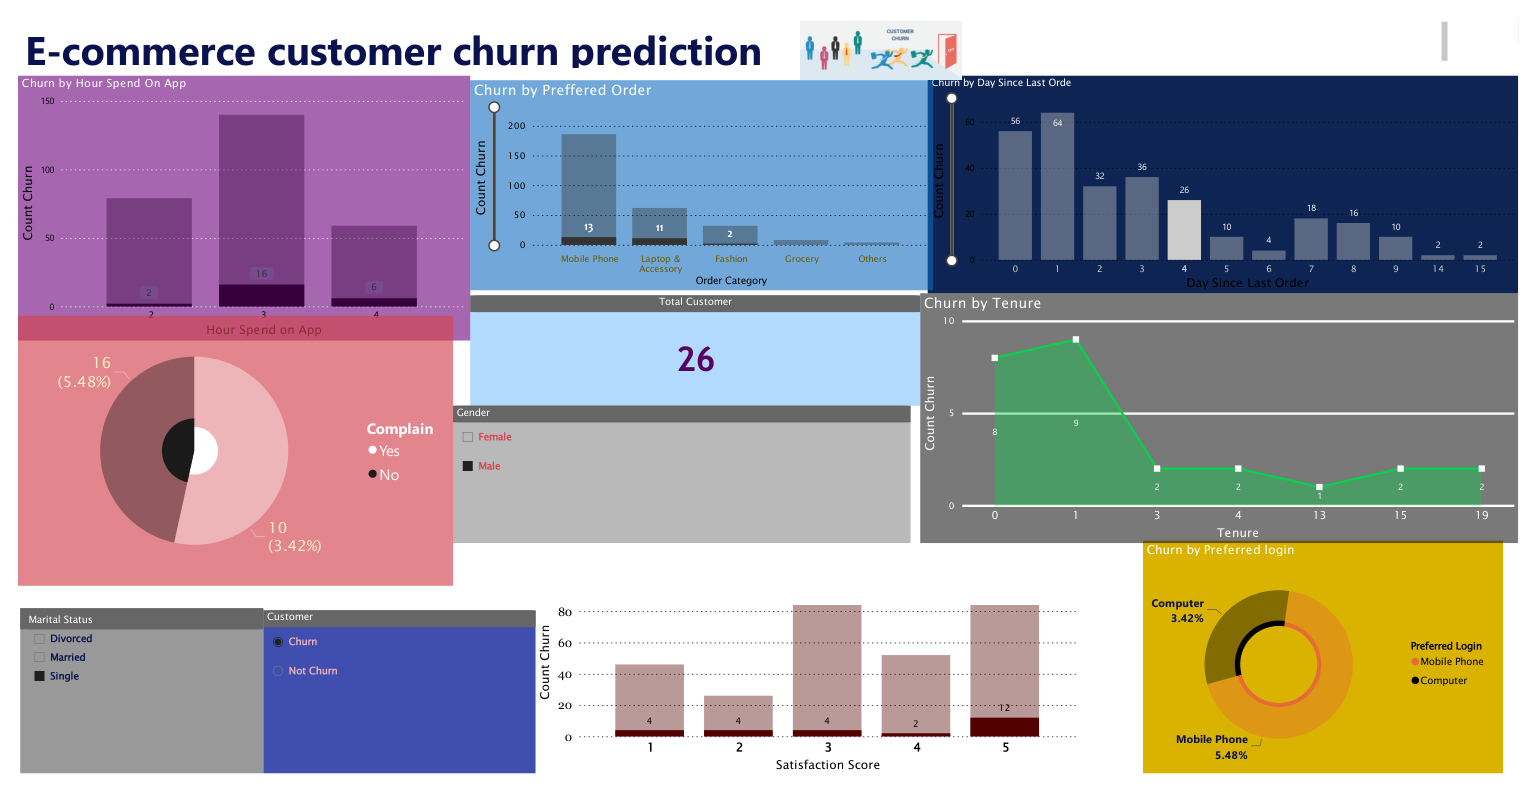

In [ ]:
import fitz

# Open the PDF file
pdf_file = 'DV dashboard1.pdf'
doc = fitz.open(pdf_file)

# Get the first page (index 0)
page = doc[0]

# Get the pixel data of the page as a PNG image
image_data = page.get_pixmap()

# Save the image data to a file
image_file = 'output_image.png'
image_data.save(image_file)

# Close the PDF file
doc.close()

# Display the saved image file
from IPython.display import Image
Image(filename=image_file)
